# **MIE1513: Final Project**
### Submission date: April 20, 2020 at 23:59pm

-------------

## Academic Integrity Declaration:
In submitting this assessment, I confirm that my conduct during this project adheres to the Code of Behaviour on Academic Matters. I confirm that I have not acted in such a way that would constitute cheating, misrepresentation, or unfairness, including but not limited to, using unauthorized aids and assistance, impersonating another person, and committing plagiarism. I pledge upon my honour that I have not violated the Faculty of Applied Science & Engineering’s Honour Code during this assessment.

-------------


## Part 1: Data Loading

### (a) Load the provided dataset (reddit_data.json)

In [0]:
!pip install whoosh

In [0]:
from whoosh import index, writing
from whoosh.fields import Schema, TEXT, KEYWORD, ID, STORED
from whoosh.analysis import *
from whoosh.qparser import QueryParser
import os.path
from pathlib import Path
import tempfile
import subprocess
import nltk
from nltk.stem import *

# download required resources
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [0]:
#Operation
import operator

#Natural Language Processing Packages
import re
import nltk

## Download Resources
nltk.download("vader_lexicon")
nltk.download("stopwords")
nltk.download("averaged_perceptron_tagger")
nltk.download("wordnet")

from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.tag import PerceptronTagger
from nltk.data import find

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [0]:

#Plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Data Packages
import math
import pandas
import numpy as np

#Progress bar
from tqdm import tqdm

#Counter
from collections import Counter

#Operation
import operator

#Natural Language Processing Packages
import re
import nltk

## Download Resources
nltk.download("vader_lexicon")
nltk.download("stopwords")
nltk.download("averaged_perceptron_tagger")
nltk.download("wordnet")

from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.tag import PerceptronTagger
from nltk.data import find

## Machine Learning
import sklearn
import sklearn.metrics as metrics
from sklearn.metrics import f1_score, precision_score, confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import accuracy_score, confusion_matrix



#pandas
import pandas as pd
import numpy as np

#similarity

from sklearn.metrics.pairwise import cosine_similarity


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
import os
import re
from pathlib import Path
import nltk
from nltk.stem import *

# download required resources
nltk.download("wordnet")

from collections import Counter
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.exceptions import ConvergenceWarning
import numpy as np
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
import random
random.seed()
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
data_all = pd.read_json("reddit_data.zip", orient='records', lines=True)
data_all = data_all[["id", "author", "created_utc", "subreddit", "title", "num_comments", "score", "selftext", "url"]]

In [0]:
data_all.head(2)

,id,author,created_utc,subreddit,title,num_comments,score,selftext,url
0,abcupx,WithGravy,1546300839,gaming,What are some game games to enjoy on a low-end...,31,3,Got a new laptop and want to enjoy some games ...,https://www.reddit.com/r/gaming/comments/abcup...
1,abcuz2,mikebeingfrank,1546300881,pics,"In 1964, an average wage worker had to clock 8...",4,5,,https://i.redd.it/j6rqqthwcp721.jpg


### (b)	Generate your unique subset of the data

**Make sure you update unique_string with your email address**

In [0]:
# DO NOT CHANGE THE FUNCTION BELOW
def getMySubreddits(data, my_str):
    assert my_str != "", "You must fill in your unique string"
    import random
    subreddits = sorted(data["subreddit"].unique().tolist())
    rng = random.Random(my_str)
    return rng.sample(subreddits, 4)

In [0]:
# Fill in your UofT email in the variable unique_string below
unique_string = "sahil.saxena@mail.utoronto.ca" 
my_subreddits = getMySubreddits(data_all, unique_string)
print("My subreddits:", my_subreddits)

My subreddits: ['todayilearned', 'Games', 'nba', 'atheism']


In [0]:
data = data_all[data_all["subreddit"].isin(my_subreddits)]

In [0]:
data.head(2)

,id,author,created_utc,subreddit,title,num_comments,score,selftext,url
10,abcvk9,[deleted],1546300986,todayilearned,"TIL the IRS spent nearly $11 million on guns, ...",0,1,[deleted],https://www.wsj.com/articles/why-does-the-irs-...
12,abcvsw,kjoke0,1546301031,atheism,so its new year and i didnt want to go to church,8,10,My family has this tradition of going to churc...,https://www.reddit.com/r/atheism/comments/abcv...


In [0]:
data.shape

(22063, 9)

In [0]:
#ensure dataframe index is correct
data.reset_index(drop = True, inplace = True)
data.head()

,id,author,created_utc,subreddit,title,num_comments,score,selftext,url
0,abcvk9,[deleted],1546300986,todayilearned,"TIL the IRS spent nearly $11 million on guns, ...",0,1,[deleted],https://www.wsj.com/articles/why-does-the-irs-...
1,abcvsw,kjoke0,1546301031,atheism,so its new year and i didnt want to go to church,8,10,My family has this tradition of going to churc...,https://www.reddit.com/r/atheism/comments/abcv...
2,abcvzx,bornfromblue,1546301066,nba,Spurs' Gay out vs. Celtics with injured wrist,12,11,,http://www.espn.com/nba/story/_/id/25657654/ru...
3,abcx6g,chrisaed,1546301283,todayilearned,TIL that America had a period where “Fly In Dr...,2,88,,http://cinematreasures.org/theaters/8593
4,abcx6p,Consinneration,1546301284,todayilearned,"TIL If Andromeda reflected more light, it woul...",14,25,,https://waitbutwhy.com/2014/06/andromeda-brigh...


In [0]:
#convert timestamp datatype
data_1 = data.copy()
data_1["timestamp"] = data_1["created_utc"].apply(lambda x: pd.Timestamp(x, unit = 's'))
data = data_1.copy()
data.drop(["created_utc"], axis = 1, inplace = True)
data.head()

,id,author,subreddit,title,num_comments,score,selftext,url,timestamp
0,abcvk9,[deleted],todayilearned,"TIL the IRS spent nearly $11 million on guns, ...",0,1,[deleted],https://www.wsj.com/articles/why-does-the-irs-...,2019-01-01 00:03:06
1,abcvsw,kjoke0,atheism,so its new year and i didnt want to go to church,8,10,My family has this tradition of going to churc...,https://www.reddit.com/r/atheism/comments/abcv...,2019-01-01 00:03:51
2,abcvzx,bornfromblue,nba,Spurs' Gay out vs. Celtics with injured wrist,12,11,,http://www.espn.com/nba/story/_/id/25657654/ru...,2019-01-01 00:04:26
3,abcx6g,chrisaed,todayilearned,TIL that America had a period where “Fly In Dr...,2,88,,http://cinematreasures.org/theaters/8593,2019-01-01 00:08:03
4,abcx6p,Consinneration,todayilearned,"TIL If Andromeda reflected more light, it woul...",14,25,,https://waitbutwhy.com/2014/06/andromeda-brigh...,2019-01-01 00:08:04


## Part 2a: Exploratory Data Analysis - Univariate

In [0]:
#we look into each column one by one

### Target Variable

#### General

Text(0, 0.5, 'Number of Records')

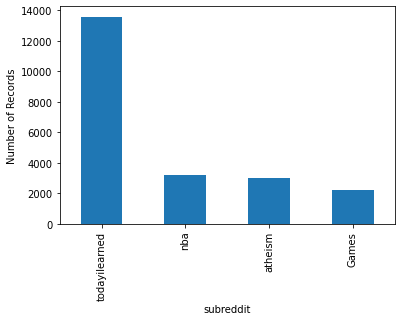

In [0]:
df_temp = data.groupby("subreddit")["id"].agg("count")
df_temp = df_temp.sort_values(ascending = False)
df_temp.plot.bar()
plt.ylabel("Number of Records")

We see that the target variable is heavily imbalanced due to about 4x more records for todayilearned compared to the other subreddit classes. 

### Variable: ID

#### Unique values

In [0]:
print("There are ", data.shape[0], "observations, and ", data["id"].nunique(), "unique id values")

There are  22063 observations, and  22063 unique id values


#### Blank Values

In [0]:
#no blank ID  alues
x = data[data["id"] == ""]
x.shape[0]

0

ID is indeed a unique identifier with no blank values

### Variable: Author

#### Null Value

In [0]:
#no null values
data["author"].isnull().sum()

0

In [0]:
#no blank values
x = data[data["author"] == ""]
x.shape[0]

0

#### Unique Value

In [0]:
print("There are ", data.shape[0], "observations, and ", data["author"].nunique(), "unique id values")

There are  22063 observations, and  10872 unique id values


No null or blank values in author column. 

#### General

In [0]:

x = data["author"].value_counts()
x = x[x == 1]
print("We have ", len(x), "who have only posted once out of ", data.shape[0], "total number of posts")

We have  9204 who have only posted once out of  22063 total number of posts


About 40% of authors have posted only once. For these posts, author column will not be informative for classification

In [0]:
data["author"].value_counts()[0:10]

[deleted]        6213
zeibfps           403
gamesforkhan      203
Sarah_NEW         183
jaeschke           73
questiondudes      57
ChaseDonovan       54
fordismyname       39
drewiepoodle       35
summaysanga        34
Name: author, dtype: int64

About 30% of the observations are [deleted]

In [0]:
#TopK author's by Each Class
def getTopK(df, k, label_value, value_column, label_column='subreddit', operation=operator.eq):
    counter = Counter()
    for review in df.loc[operation(df[label_column],label_value)][value_column]:
            counter.update([word.lower() 
                            for word 
                            in re.findall(r'\w+', review) 
                            if len(word) > 2])
    topk = counter.most_common(k)
    return topk

In [0]:
# Simple example of getting pairwise mutual information of a term
def pmiCal(df, x):
    pmilist=[]
    for i in ['todayilearned','Games','nba','atheism' ]:
        for j in [0,1]:
            px = sum(df['subreddit']==i)/len(df)
            py = sum(df[x]==j)/len(df)
            pxy = len(df[(df['subreddit']==i) & (df[x]==j)])/len(df)
            if pxy==0:#Log 0 cannot happen
                pmi = math.log((pxy+0.0001)/(px*py))
            else:
                pmi = math.log(pxy/(px*py))
            pmilist.append([i]+[j]+[px]+[py]+[pxy]+[pmi])
    pmidf = pandas.DataFrame(pmilist)
    pmidf.columns = ['x','y','px','py','pxy','pmi']
    return pmidf

In [0]:
def pmiIndivCal(df,x,gt, label_column='subreddit'):
    px = sum(df[label_column]==gt)/len(df)
    py = sum(df[x]==1)/len(df)
    pxy = len(df[(df[label_column]==gt) & (df[x]==1)])/len(df)
    if pxy==0:#Log 0 cannot happen
        pmi = math.log((pxy+0.0001)/(px*py))
    else:
        pmi = math.log(pxy/(px*py))
    return pmi

In [0]:
# Compute PMI for all terms and all possible labels
def pmiForAllCal(df, topk, label_column='subreddit'):


  # 'todayilearned', 'Games', 'nba', 'atheism'
    #Try calculate all the pmi for top k and store them into one pmidf dataframe
    pmilist = []
    pmi_learn = []
    pmi_games = []
    pmi_nba = []
    pmi_atheist = []
    for word in tqdm(topk):
        pmilist.append([word[0]]+[pmiCal(df,word[0])])
        pmi_learn.append([word[0]]+[pmiIndivCal(df,word[0],'todayilearned',label_column)])
        pmi_games.append([word[0]]+[pmiIndivCal(df,word[0],'Games',label_column)])
        pmi_nba.append([word[0]]+[pmiIndivCal(df,word[0],'nba',label_column)])
        pmi_atheist.append([word[0]]+[pmiIndivCal(df,word[0],'atheism',label_column)])
    pmidf = pandas.DataFrame(pmilist)
    pmi_learn = pandas.DataFrame(pmi_learn)
    pmi_games = pandas.DataFrame(pmi_games)
    pmi_nba = pandas.DataFrame(pmi_nba)
    pmi_atheist = pandas.DataFrame(pmi_atheist)
    pmi_learn.columns = ['word','pmi']
    pmi_games.columns = ['word','pmi']
    pmi_nba.columns = ['word','pmi']
    pmi_atheist.columns = ['word','pmi']
    pmidf.columns = ['word','pmi']
    return pmi_learn, pmi_games,pmi_nba,pmi_atheist, pmidf

In [0]:
# Note: You may want to use an NLTK tokenizer instead of a regular expression in the following
def dataFrameTransformation(hotelDf, reviewDF, col_name, k=500):
    reviews = reviewDF[col_name].values
       
    # Top-k frequent terms
    counter = Counter()
    for review in reviews:
            counter.update([word.lower() 
                            for word 
                            in re.findall(r'\w+', review) 
                            if len(word) > 2])
    topk = counter.most_common(k)      

    
    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter([word.lower() for word in re.findall(r'\w+',reviews[i])])
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)
        
        
    #Prepare freqReviewDf
    freqReviewDf = pandas.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finalreviewDf = reviewDF.join(freqReviewDf)
    finaldf = hotelDf[["subreddit", "id"]].join(finalreviewDf)
    return topk, finaldf

In [0]:
# get Top K mutual information terms from the dataframe
def getMI(topk, df, label_column='subreddit'):
    miScore = []
    for word in topk:
        miScore.append([word[0]]+[metrics.mutual_info_score(finaldf[label_column], finaldf[word[0]])])
    miScoredf = pandas.DataFrame(miScore).sort_values(1,ascending=0)
    miScoredf.columns = ['Word','MI Score']
    return miScoredf

Let's take a quick look at top_k authors for each class

In [0]:
topk_today = getTopK(df=data, k=50000, label_value='todayilearned', value_column='author')
print("Class todayilearned")
topk_today[0:5]

Class todayilearned


[('deleted', 4226),
 ('sarah_new', 183),
 ('jaeschke', 73),
 ('questiondudes', 57),
 ('chasedonovan', 54)]

In [0]:
topk_games = getTopK(df=data, k=50000, label_value='Games', value_column='author')
print("Class Games")
topk_games[0:5]

Class Games


[('zeibfps', 403),
 ('deleted', 399),
 ('gamesforkhan', 203),
 ('summaysanga', 34),
 ('gaminggideon', 24)]

In [0]:
#post count by an author within the class
topk_nba = getTopK(df=data, k=50000, label_value='nba', value_column='author')
print("Class NBA")
topk_nba[0:5]

Class NBA


[('deleted', 787),
 ('andyjpuente', 32),
 ('urfaselol', 24),
 ('lonzobbball', 22),
 ('greedruinedmylife', 21)]

In [0]:
topk_atheism = getTopK(df=data, k=50000, label_value='atheism', value_column='author')
print("Class atheism")
topk_atheism[0:5]

Class atheism


[('deleted', 801),
 ('drewiepoodle', 35),
 ('filthyheathenmonkey', 33),
 ('mepper', 29),
 ('yehtox48', 17)]

In [0]:
data.head(2)

,id,author,subreddit,title,num_comments,score,selftext,url,timestamp
0,abcvk9,[deleted],todayilearned,"TIL the IRS spent nearly $11 million on guns, ...",0,1,[deleted],https://www.wsj.com/articles/why-does-the-irs-...,2019-01-01 00:03:06
1,abcvsw,kjoke0,atheism,so its new year and i didnt want to go to church,8,10,My family has this tradition of going to churc...,https://www.reddit.com/r/atheism/comments/abcv...,2019-01-01 00:03:51


#### Mutual Information

In [0]:
reviewDF = data[["author", "score"]]
otherDF = data[["subreddit", "id"]]


topk, finaldf = dataFrameTransformation(otherDF, reviewDF, "author", k=50)

In [0]:
miScoredf = getMI(topk, finaldf)
miScoredf.sort_values("MI Score", ascending = False)[0:20]

,Word,MI Score
1,zeibfps,0.043474
2,gamesforkhan,0.021486
0,deleted,0.004752
3,sarah_new,0.004036
9,summaysanga,0.003544
8,drewiepoodle,0.003166
10,filthyheathenmonkey,0.002985
11,andyjpuente,0.002796
14,mepper,0.002622
18,gaminggideon,0.002499


We see for example that author zeibfps perhaps holds class information. Let's investigate further with PMI 

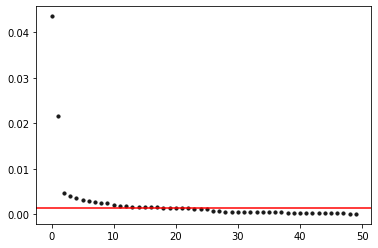

In [0]:
miScoredf_st = miScoredf.sort_values("MI Score", ascending = False)

miScoredf_st.reset_index(inplace = True, drop = True)

plt.scatter(x = miScoredf_st.index, y = (miScoredf_st["MI Score"]), s=10, color=".1")
plt.axhline(y=0.0015, color='r', linestyle='-')

Most of the scores are below 0.005. We notice a couple of outliers (i.e. high class information). We see that an asymptotic shape emerging w.r.t. MI scores.  

#### Pointwise Mutual Info

In [0]:
pmi_learn, pmi_games, pmi_nba,pmi_atheist, pmidf = pmiForAllCal(finaldf, topk)


100%|██████████| 50/50 [00:08<00:00,  6.05it/s]


In [0]:
pmi_learn.sort_values("pmi", ascending = False)[0:10]


,word,pmi
25,zeamp,0.483979
13,ltsharif,0.483979
30,firsthoops,0.483979
33,dlatrex,0.483979
24,sarah_adam_awesome,0.483979
23,yourownbiggestfan,0.483979
36,harboringonalament,0.483979
21,trot,0.483979
20,redmambo_no6,0.483979
39,amansaggu26,0.483979


In [0]:
pmi_games.sort_values("pmi", ascending = False)[0:10]

,word,pmi
18,gaminggideon,2.292798
2,gamesforkhan,2.292798
48,cybershocker455,2.292798
1,zeibfps,2.292798
9,summaysanga,2.292798
15,ebulkemailmarketing,0.717261
21,trot,0.686219
49,rayshard,0.519165
47,etohmartini,0.519165
45,chris,0.445057


In [0]:
pmi_nba.sort_values("pmi", ascending = False)[0:10]

,word,pmi
49,rayshard,1.923279
11,andyjpuente,1.923279
22,lonzobbball,1.923279
31,bodbdhe,1.923279
19,urfaselol,1.923279
32,jasonh0711,1.923279
34,anotherduck,1.923279
37,deadskin,1.923279
26,greedruinedmylife,1.923279
38,rasheediscool,1.923279


In [0]:
pmi_atheist.sort_values("pmi", ascending = False)[0:10]

,word,pmi
10,filthyheathenmonkey,1.990966
8,drewiepoodle,1.990966
35,yehtox48,1.990966
14,mepper,1.990966
40,blerrycat,1.990966
21,trot,0.384387
41,the,0.381528
49,rayshard,0.217333
47,etohmartini,0.217333
48,cybershocker455,0.217333


For the above, we see that some authors have relatively higher PMI scores than others within each class. It is suggestive that select authors have high co-occurence with certain classes, which can be informative to the classification model. For example author gaminggideon frequently occurs/posts to subreddit Games. Another example is author lonzobball frequently occurs/posts to subreddit nba. Hence, including the authors with high PMI scores could contribute to the classification ability of the model.

We saw asymptotic shape emerging in MI. Also, in PMI, we see distinct groups e.g. PMI for some authors are relatively very large, while others have more or less similar PMI score. Hence, it seems sufficient to take top 5 (k=5) authors from each class as our features in the classification model going forward. We will use boolean feature encoding for these authors.





In [0]:
#take top5 and store in list. We will later use this list to create boolean encoding features.
word_list_author = []
x = pmi_learn.sort_values("pmi", ascending = False)
word_list_author.append(x["word"].values.tolist()[0:5])

x = pmi_games.sort_values("pmi", ascending = False)
word_list_author.append(x["word"].values.tolist()[0:5])

x = pmi_nba.sort_values("pmi", ascending = False)
word_list_author.append(x["word"].values.tolist()[0:5])

x = pmi_atheist.sort_values("pmi", ascending = False)
word_list_author.append(x["word"].values.tolist()[0:5])

### Variable: URL

#### Null Value

In [0]:
#no null values
data["url"].isnull().sum()

0

In [0]:
x = data[data["url"] == ""]
x.shape[0]

0

No null or blank entries

#### General

Let's first conduct some pre-processing for URL

In [0]:
#remove certain characters
data["url"] = data['url'].str.replace('http','')
data["url"] = data['url'].str.replace('com/','')
data["url"] = data['url'].str.replace('www','')
data["url"] = data['url'].str.replace('htm','')
# data["url"] = data['url'].str.replace('reddit','')
data.head()

,id,author,subreddit,title,num_comments,score,selftext,url,timestamp
0,abcvk9,[deleted],todayilearned,"TIL the IRS spent nearly $11 million on guns, ...",0,1,[deleted],s://.wsj.articles/why-does-the-irs-need-guns-1...,2019-01-01 00:03:06
1,abcvsw,kjoke0,atheism,so its new year and i didnt want to go to church,8,10,My family has this tradition of going to churc...,s://.reddit.r/atheism/comments/abcvsw/so_its_n...,2019-01-01 00:03:51
2,abcvzx,bornfromblue,nba,Spurs' Gay out vs. Celtics with injured wrist,12,11,,://.espn.nba/story/_/id/25657654/rudy-gay-san-...,2019-01-01 00:04:26
3,abcx6g,chrisaed,todayilearned,TIL that America had a period where “Fly In Dr...,2,88,,://cinematreasures.org/theaters/8593,2019-01-01 00:08:03
4,abcx6p,Consinneration,todayilearned,"TIL If Andromeda reflected more light, it woul...",14,25,,s://waitbutwhy.2014/06/andromeda-brighter-youd...,2019-01-01 00:08:04


In [0]:
reviewDF = data[["url", "score"]]
otherDF = data[["subreddit", "id"]]


topk, finaldf = dataFrameTransformation(otherDF, reviewDF, "url", k=50)

In [0]:
topk_today = getTopK(df=data, k=50000, label_value='todayilearned', value_column='url')
print("Class todayilearned")
topk_today[0:5]

Class todayilearned


[('org', 4720),
 ('wiki', 4029),
 ('wikipedia', 3950),
 ('the', 2472),
 ('amp', 2197)]

In [0]:
topk_games = getTopK(df=data, k=50000, label_value='Games', value_column='url')
print("Class Games")
topk_games[0:5]

Class Games


[('reddit', 1103),
 ('comments', 1098),
 ('games', 910),
 ('utm_source', 618),
 ('2016', 607)]

In [0]:
#post count by an author within the class
topk_nba = getTopK(df=data, k=50000, label_value='nba', value_column='url')
print("Class NBA")
topk_nba[0:5]

Class NBA


[('nba', 2244),
 ('reddit', 2181),
 ('comments', 2177),
 ('streamable', 336),
 ('twitter', 267)]

In [0]:
topk_atheism = getTopK(df=data, k=50000, label_value='atheism', value_column='url')
print("Class atheism")
topk_atheism[0:5]

Class atheism


[('reddit', 1919),
 ('comments', 1909),
 ('atheism', 1863),
 ('2019', 294),
 ('news', 252)]

Nothing obvious from here asides from a few words like nba and atheism that appears in the URL which could be informative to the model. Let's investigate further using MI

#### Mutual Information

In [0]:
miScoredf = getMI(topk, finaldf)
miScoredf.sort_values("MI Score", ascending = False)[0:20]

,Word,MI Score
1,comments,0.275925
0,reddit,0.265725
7,nba,0.235383
8,atheism,0.198683
2,org,0.101990
13,games,0.100005
3,wiki,0.098772
4,wikipedia,0.096759
17,utm_source,0.055368
16,2016,0.049970


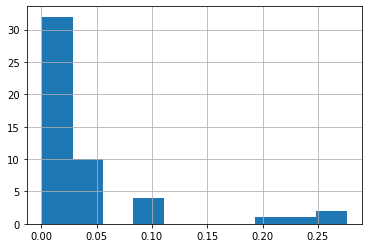

In [0]:
x = miScoredf["MI Score"]
x.hist()

We can clearly see two "groups" i.e. words with MI>0.06 or MI<0.06

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f24a163a390>]],
      dtype=object)

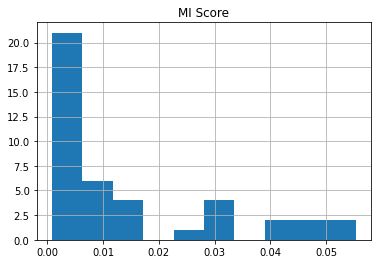

In [0]:
x = miScoredf[miScoredf["MI Score"] < 0.06]
x.hist()

Most of the values are less than 0.01

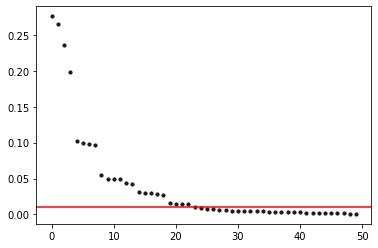

In [0]:
miScoredf_st = miScoredf.sort_values("MI Score", ascending = False)

miScoredf_st.reset_index(inplace = True, drop = True)

plt.scatter(x = miScoredf_st.index, y = (miScoredf_st["MI Score"]), s=10, color=".1")
plt.axhline(y=0.010, color='r', linestyle='-')

We want to make sure we include the high MI terms. There is a little bit of an asymptotic shape emerging.  

#### Pointwise Mutual Information

In [0]:
pmi_learn, pmi_games, pmi_nba,pmi_atheist, pmidf = pmiForAllCal(finaldf, topk)


100%|██████████| 50/50 [00:08<00:00,  5.96it/s]


In [0]:
pmi_learn.sort_values("pmi", ascending = False)[0:10]

,word,pmi
4,wikipedia,0.482458
3,wiki,0.482241
2,org,0.457803
45,2017,0.454126
35,history,0.445758
40,you,0.436726
21,google,0.435485
32,how,0.419621
39,why,0.406521
36,that,0.382369


In [0]:
pmi_games.sort_values("pmi", ascending = False)[0:10]

,word,pmi
25,standalone,2.292798
29,cochagamer,2.292798
24,dayz,2.292798
47,fails,2.292798
28,ifttt,2.285381
13,games,2.278535
43,gaming,2.271520
17,utm_source,2.134495
16,2016,2.015466
19,index,1.955974


In [0]:
pmi_nba.sort_values("pmi", ascending = False)[0:10]

,word,pmi
7,nba,1.918819
37,streamable,1.914390
33,status,1.581930
30,twitter,1.522839
1,comments,1.040906
0,reddit,1.027294
15,youtu,-0.458050
14,watch,-0.568272
12,youtube,-0.716705
34,story,-0.860609


In [0]:
pmi_atheist.sort_values("pmi", ascending = False)[0:10]

,word,pmi
8,atheism,1.990966
1,comments,0.977224
0,reddit,0.965832
10,2019,0.583565
9,news,0.137683
27,world,0.034720
14,watch,-0.022283
49,with,-0.044416
34,story,-0.099775
26,from,-0.123028


In [0]:
word_list_url = []
x = pmi_learn.sort_values("pmi", ascending = False)
word_list_url.append(x["word"].values.tolist()[0:5])

x = pmi_games.sort_values("pmi", ascending = False)
word_list_url.append(x["word"].values.tolist()[0:5])

x = pmi_nba.sort_values("pmi", ascending = False)
word_list_url.append(x["word"].values.tolist()[0:5])

x = pmi_atheist.sort_values("pmi", ascending = False)
word_list_url.append(x["word"].values.tolist()[0:5])

As expected, we see terms like:
1. Wikipedia as being informative in subreddit todayilearned
2. Gaming to be informative for subreddit Games
3. nba to be informative for subreddit nba
4. atheism to be informative for subreddit atheism

Again, taking top 5 (k=5) terms seems like a good start, as we clearly see some terms holding more class information than others. We will use boolean feature encoding for these terms.

### Variable: Title

#### Null Value

In [0]:
#no null values
data["title"].isnull().sum()

0

In [0]:
x = data[data["title"] == ""]
x.shape[0]

0

No null or blank entries

#### Symbol Analysis

Let's see if certain symbols appear more so in some classes than others

In [0]:
#perform a count of occurence for certain symbols in the title column
data['dollar_sign'] = data['title'].apply(lambda x: len([x for x in x.split() if x.startswith('$')]))
data['ast_sign'] = data['title'].apply(lambda x: len([x for x in x.split() if x.startswith('*')]))
data['at_sign'] = data['title'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))
data['hash_sign'] = data['title'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
data.head()

,id,author,subreddit,title,num_comments,score,selftext,url,timestamp,dollar_sign,ast_sign,at_sign,hash_sign
0,abcvk9,[deleted],todayilearned,"TIL the IRS spent nearly $11 million on guns, ...",0,1,[deleted],s://.wsj.articles/why-does-the-irs-need-guns-1...,2019-01-01 00:03:06,2,0,0,0
1,abcvsw,kjoke0,atheism,so its new year and i didnt want to go to church,8,10,My family has this tradition of going to churc...,s://.reddit.r/atheism/comments/abcvsw/so_its_n...,2019-01-01 00:03:51,0,0,0,0
2,abcvzx,bornfromblue,nba,Spurs' Gay out vs. Celtics with injured wrist,12,11,,://.espn.nba/story/_/id/25657654/rudy-gay-san-...,2019-01-01 00:04:26,0,0,0,0
3,abcx6g,chrisaed,todayilearned,TIL that America had a period where “Fly In Dr...,2,88,,://cinematreasures.org/theaters/8593,2019-01-01 00:08:03,0,0,0,0
4,abcx6p,Consinneration,todayilearned,"TIL If Andromeda reflected more light, it woul...",14,25,,s://waitbutwhy.2014/06/andromeda-brighter-youd...,2019-01-01 00:08:04,0,0,0,0


In [0]:
data.groupby("subreddit")["dollar_sign"].agg(["mean", "median", "max", "min", "count", "sum"])

,mean,median,max,min,count,sum
subreddit,,,,,,
Games,0.014811,0,3,0,2228,33
atheism,0.007302,0,2,0,3013,22
nba,0.006824,0,2,0,3224,22
todayilearned,0.031622,0,4,0,13598,430


We look at the mean value and see that dollar_sign appears a lot more in todayilearned on average. This feature will be used going forward in the classification model.

In [0]:
#we see that # sign is rarely used
data.groupby("subreddit")["ast_sign"].agg(["mean", "median", "max", "min", "count", "sum"])

,mean,median,max,min,count,sum
subreddit,,,,,,
Games,0.001795,0,2,0,2228,4
atheism,0.001991,0,1,0,3013,6
nba,0.000931,0,1,0,3224,3
todayilearned,0.001691,0,2,0,13598,23


No susbtantial difference in the use of asterisk between the classes

In [0]:
data.groupby("subreddit")["hash_sign"].agg(["mean", "median", "max", "min", "count", "sum"])

,mean,median,max,min,count,sum
subreddit,,,,,,
Games,0.219031,0,4,0,2228,488
atheism,0.005642,0,2,0,3013,17
nba,0.010236,0,6,0,3224,33
todayilearned,0.007354,0,8,0,13598,100


We see that on average, hash sign is used far less often in atheism compared to nba. This feature will be used in the classification model.

In [0]:
data.groupby("subreddit")["at_sign"].agg(["mean", "median", "max", "min", "count", "sum"])

,mean,median,max,min,count,sum
subreddit,,,,,,
Games,0.001795,0,1,0,2228,4
atheism,0.000332,0,1,0,3013,1
nba,0.029156,0,7,0,3224,94
todayilearned,0.000221,0,1,0,13598,3


We see that @ sign is also used far more often in nba than other classes. We will include this feature in the model.

Observations from Symbol Analysis:

1. Dollar sign is used more often in todayilearned class than others. We will include this count as a feature column in model.

3. (*) sign is not particularly suggestive of a class. This will be excluded from classification model.

2. (#) sign potentially holds class information. We will include this count as a feature column in model.

2. (@) potentially holds class information. We will include this count as a feature column in model.




In [0]:
#TopK author's by Each Class with stopwords
def getTopK(df, k, label_value, value_column, label_column='subreddit', operation=operator.eq):
    stop = set(stopwords.words('english'))
    counter = Counter()
    for review in df.loc[operation(df[label_column],label_value)][value_column]:
            counter.update([word.lower() 
                            for word 
                            in re.findall(r'\w+', review) 
                            if word.lower() not in stop and len(word) > 2])
    topk = counter.most_common(k)
    return topk

In [0]:
#with stopwords
def dataFrameTransformation(hotelDf, reviewDF, col_name, k=500):
    reviews = reviewDF[col_name].values
    stop = set(stopwords.words('english'))

    # Top-k frequent terms
    counter = Counter()
    for review in reviews:
            counter.update([word.lower() 
                            for word 
                            in re.findall(r'\w+', review) 
                            if word.lower() not in stop and len(word) > 2])
    topk = counter.most_common(k)      

    
    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter([word.lower() for word in re.findall(r'\w+',reviews[i])])
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)
        
        
    #Prepare freqReviewDf
    freqReviewDf = pandas.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finalreviewDf = reviewDF.join(freqReviewDf)
    finaldf = hotelDf[["subreddit", "id"]].join(finalreviewDf)
    return topk, finaldf

Note that the two functions above are different from above because they include stopword removal. Stopword removal is used for title and selftext column exploration since it is assumed they will have a sentence structure (as opposed to columns author and URL). In texts with sentence structure, we do not expect the common words like 'the', 'and' etc. to hold important information about the class.

In [0]:
reviewDF = data[["title", "score"]]
otherDF = data[["subreddit", "id"]]


topk, finaldf = dataFrameTransformation(otherDF, reviewDF, "title", k=50)

#### Mutual Information

In [0]:
miScoredf = getMI(topk, finaldf)
miScoredf.sort_values("MI Score", ascending = False)[0:20]

,Word,MI Score
0,til,0.446564
20,standalone,0.049109
2,game,0.039432
28,nba,0.028333
15,games,0.021609
29,god,0.017719
16,war,0.010737
14,best,0.010728
45,team,0.009655
12,used,0.009128


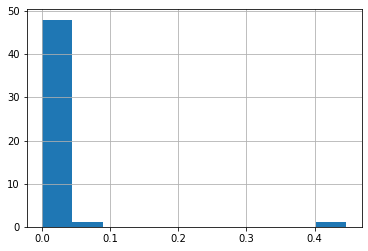

In [0]:
x = miScoredf["MI Score"]
x.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f24a10f8780>]],
      dtype=object)

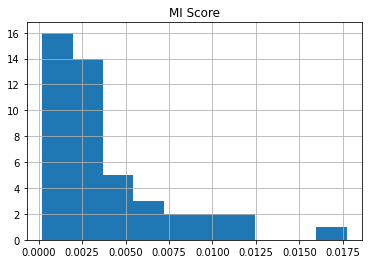

In [0]:
x = miScoredf[miScoredf["MI Score"] <0.02]
x.hist()

Most of the features are MI<0.0125.

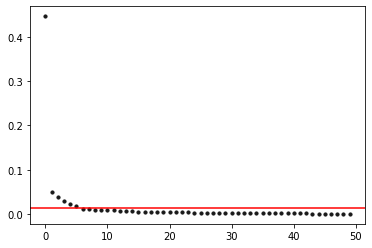

In [0]:
miScoredf_st = miScoredf.sort_values("MI Score", ascending = False)

miScoredf_st.reset_index(inplace = True, drop = True)

plt.scatter(x = miScoredf_st.index, y = (miScoredf_st["MI Score"]), s=10, color=".1")
plt.axhline(y=0.013, color='r', linestyle='-')

There is a little bit of an elbow shape emerging. 

#### Pointwise Mutual Information

In [0]:
pmi_learn, pmi_games, pmi_nba,pmi_atheist, pmidf = pmiForAllCal(finaldf, topk)

100%|██████████| 50/50 [00:08<00:00,  6.22it/s]


In [0]:
pmi_learn.sort_values("pmi", ascending = False)[0:10]

,word,pmi
0,til,0.482794
37,named,0.462473
12,used,0.447939
11,called,0.431974
19,000,0.408877
32,million,0.393595
27,actually,0.382938
42,use,0.382085
25,name,0.381908
31,also,0.379806


In [0]:
pmi_games.sort_values("pmi", ascending = False)[0:10]

,word,pmi
20,standalone,2.292798
15,games,1.757104
2,game,1.537753
14,best,1.471817
16,war,1.361565
47,free,1.048678
44,2019,1.036639
6,world,0.933515
8,new,0.703253
39,amp,0.318717


In [0]:
pmi_nba.sort_values("pmi", ascending = False)[0:10]

,word,pmi
28,nba,1.865491
45,team,1.530237
44,2019,0.981236
2,game,0.932567
36,last,0.742429
15,games,0.611995
23,get,0.546201
7,would,0.477037
38,back,0.443519
46,since,0.391803


In [0]:
pmi_atheist.sort_values("pmi", ascending = False)[0:10]

,word,pmi
29,god,1.731661
34,life,0.293697
13,like,0.230622
3,people,0.187932
23,get,0.000078
41,old,-0.116914
24,make,-0.162219
8,new,-0.204714
7,would,-0.257623
48,many,-0.258627


In [0]:
word_list_title = []
x = pmi_learn.sort_values("pmi", ascending = False)
word_list_title.append(x["word"].values.tolist()[0:5])

x = pmi_games.sort_values("pmi", ascending = False)
word_list_title.append(x["word"].values.tolist()[0:5])

x = pmi_nba.sort_values("pmi", ascending = False)
word_list_title.append(x["word"].values.tolist()[0:5])

x = pmi_atheist.sort_values("pmi", ascending = False)
word_list_title.append(x["word"].values.tolist()[0:5])

Similar to URL, we see terms like:
1. named and called as being informative in subreddit todayilearned
2. games to be informative for subreddit Games
3. nba to be informative for subreddit nba
4. god to be informative for subreddit atheism

Using top 5 (k=5) terms from each class seems like a good start. We will use boolean feature encoding for these terms.

### Variable: Num_Comments


#### Null Value

In [0]:
#no null values
data["num_comments"].isnull().sum()

0

No null or blank values

#### General

In [0]:
data.groupby("subreddit")["num_comments"].agg(["mean", "median", "max", "min", "count"])

,mean,median,max,min,count
subreddit,,,,,
Games,25.346499,0,2796,0,2228
atheism,32.752406,11,2985,0,3013
nba,59.393300,19,5467,1,3224
todayilearned,37.532725,1,4996,0,13598


We do not see any particular differences between the classes. Let's look at distributions

In [0]:
#how many observations are above 4996? Since this will have predictive capability i.e. nba class
# it is only one! 
x = data[data["num_comments"] > 5000]
x["num_comments"].value_counts()


5467    1
Name: num_comments, dtype: int64

In [0]:
data_learn = data[data["subreddit"] == "todayilearned"]
data_games = data[data["subreddit"] == "Games"]
data_nba= data[data["subreddit"] == "nba"]
data_atheism = data[data["subreddit"] == "atheism"]

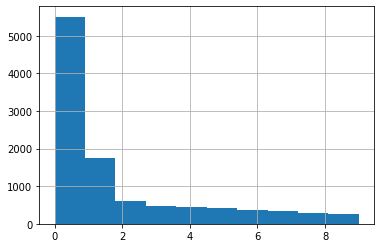

In [0]:
data_learn = data_learn[data_learn['num_comments'] < 10]
data_learn["num_comments"].hist()

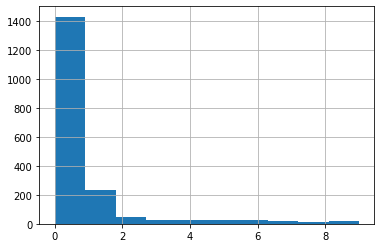

In [0]:
data_games = data_games[data_games['num_comments'] < 10]
data_games["num_comments"].hist()

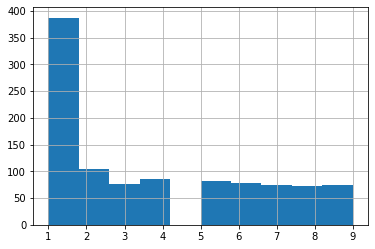

In [0]:
data_nba = data_nba[data_nba['num_comments'] < 10]
data_nba["num_comments"].hist()

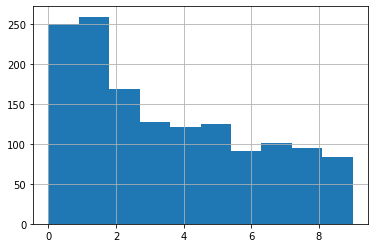

In [0]:
data_atheism = data_atheism[data_atheism['num_comments'] < 10]
data_atheism["num_comments"].hist()

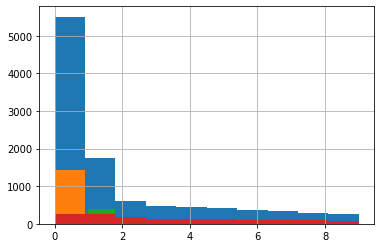

In [0]:
data_learn["num_comments"].hist()
data_games["num_comments"].hist()
data_nba["num_comments"].hist()
data_atheism["num_comments"].hist()


We see from above that the distributions are very similar between different classes. We do not expect this to be a feature with high predictive power. Hence, we will not include this feature in the model.

### Variable: Score

#### Null Value

In [0]:
#no null values
data["score"].isnull().sum()

0

No null values

#### General

In [0]:
data.groupby("subreddit")["score"].agg(["mean", "median", "max", "min", "count"])

,mean,median,max,min,count
subreddit,,,,,
Games,92.683573,1,13663,0,2228
atheism,287.839031,4,42686,0,3013
nba,217.025434,5,28067,0,3224
todayilearned,948.155096,2,125751,0,13598


In [0]:
data_learn = data[data["subreddit"] == "todayilearned"]
data_games = data[data["subreddit"] == "Games"]
data_nba= data[data["subreddit"] == "nba"]
data_atheism = data[data["subreddit"] == "atheism"]

In [0]:
data_learn.sort_values("score", ascending = True, inplace = True)
data_games.sort_values("score", ascending = True, inplace = True)
data_atheism.sort_values("score", ascending = True, inplace = True)
data_nba.sort_values("score", ascending = True, inplace = True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [0]:
data_learn.reset_index(drop = True, inplace = True)
data_games.reset_index(drop = True, inplace = True)
data_atheism.reset_index(drop = True, inplace = True)
data_nba.reset_index(drop = True, inplace = True)

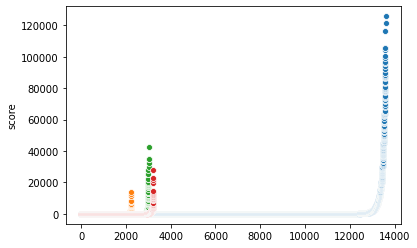

In [0]:
sns.scatterplot(x = data_learn.index, y = "score", data = data_learn)
sns.scatterplot(x = data_games.index, y = "score", data = data_games)
sns.scatterplot(x = data_atheism.index, y = "score", data = data_atheism)
sns.scatterplot(x = data_nba.index, y = "score", data = data_nba)


In [0]:
x = data[data["score"] > 50000]
x["subreddit"].value_counts()

todayilearned    71
Name: subreddit, dtype: int64

A score of over 50,000 is always for class todayilearned

Let's look at outliers

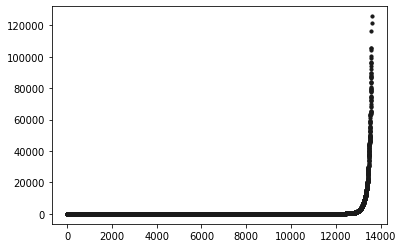

In [0]:
plt.scatter(x = data_learn.index, y = (data_learn["score"]), s=10, color=".1")

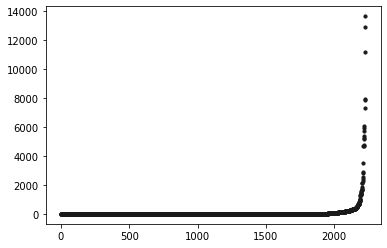

In [0]:
plt.scatter(x = data_games.index, y = (data_games["score"]), s=10, color=".1")

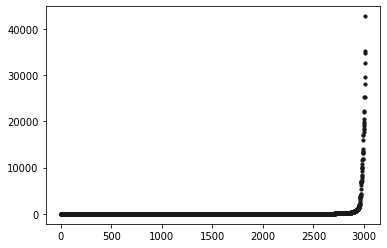

In [0]:
plt.scatter(x = data_atheism.index, y = (data_atheism["score"]), s=10, color=".1")


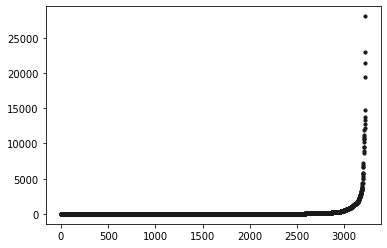

In [0]:
plt.scatter(x = data_nba.index, y = (data_nba["score"]), s=10, color=".1")

There are outliers with really high value scores for all classes. 

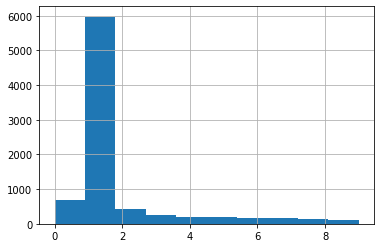

In [0]:
data_learn = data_learn[data_learn['score'] < 10]
data_learn["score"].hist()

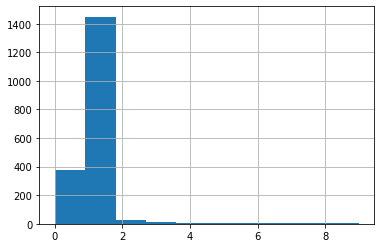

In [0]:
data_games = data_games[data_games['score'] < 10]
data_games["score"].hist()

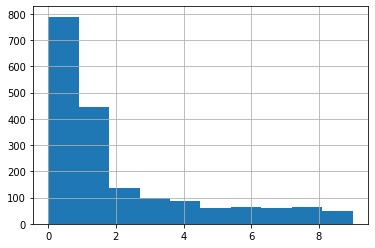

In [0]:
data_nba = data_nba[data_nba['score'] < 10]
data_nba["score"].hist()

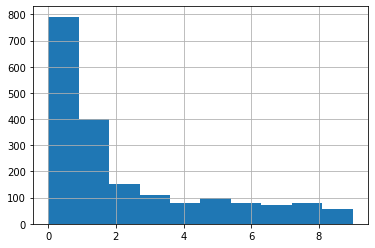

In [0]:
data_atheism = data_atheism[data_atheism['score'] < 10]
data_atheism["score"].hist()

We see that the distributions between classes are similar i.e. a score of less than 2 is the most common amongst all classes. There are outliers in each class. We also notice that if the scores are above 50,000, it is always for class todayilearned (71 observations). 

This will only be slighly helpful to the classification model. Generally, we expect this feature to have only a minor contribution towards the predictive capability of the model. It is only one column, so we will include this feature, but only after using a scaling method i.e. RobustScaler.

### Variable: Self Text

#### Null Value

In [0]:
#no null values
data["selftext"].isnull().sum()

0

In [0]:
#many blank values
x = data[data["selftext"] == ""]
x.shape[0]

12797

No null but quite a few blank entries

#### General

In [0]:
reviewDF = data[["selftext", "score"]]
otherDF = data[["subreddit", "id"]]


topk, finaldf = dataFrameTransformation(otherDF, reviewDF, "selftext", k=50)

In [0]:
topk_today = getTopK(df=data, k=50000, label_value='todayilearned', value_column='selftext')
print("Class todayilearned")
topk_today[0:5]

Class todayilearned


[('deleted', 4116), ('removed', 1)]

In [0]:
topk_games = getTopK(df=data, k=50000, label_value='Games', value_column='selftext')
print("Class Games")
topk_games[0:5]

Class Games


[('removed', 418),
 ('deleted', 278),
 ('https', 183),
 ('game', 159),
 ('com', 135)]

In [0]:
#post count by an author within the class
topk_nba = getTopK(df=data, k=50000, label_value='nba', value_column='selftext')
print("Class NBA")
topk_nba[0:5]

Class NBA


[('com', 925), ('amp', 813), ('removed', 809), ('nba', 771), ('game', 558)]

In [0]:
topk_atheism = getTopK(df=data, k=50000, label_value='atheism', value_column='selftext')
print("Class atheism")
topk_atheism[0:5]

Class atheism


[('god', 1074),
 ('people', 744),
 ('like', 700),
 ('deleted', 638),
 ('would', 543)]

Topk words for atheism are potentially representative of the class e.g. god

#### Mutual Information

In [0]:
miScoredf = getMI(topk, finaldf)
miScoredf.sort_values("MI Score", ascending = False)[0:20]

,Word,MI Score
1,removed,0.077267
5,like,0.036044
4,god,0.034636
8,people,0.030309
7,would,0.029217
12,think,0.026035
10,one,0.025805
17,religion,0.025043
13,know,0.024769
26,atheist,0.024292


Self Text column contains words like god and religion that could be helpful to the classification model

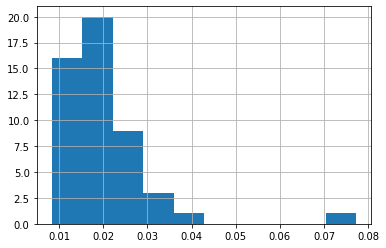

In [0]:
x = miScoredf["MI Score"]
x.hist()

Most MI scores are less than 0.025

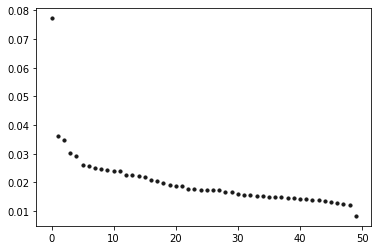

In [0]:
miScoredf_st = miScoredf.sort_values("MI Score", ascending = False)
miScoredf_st.reset_index(inplace = True, drop = True)

plt.scatter(x = miScoredf_st.index, y = (miScoredf_st["MI Score"]), s=10, color=".1")

No particular asymptotic shape emerging here. In fact, MI scores form a linear trend

#### Pointwise Mutual Information

In [0]:
pmi_learn, pmi_games, pmi_nba,pmi_atheist, pmidf = pmiForAllCal(finaldf, topk)


100%|██████████| 50/50 [00:08<00:00,  6.00it/s]


In [0]:
pmi_learn.sort_values("pmi", ascending = False)[0:10]

,word,pmi
0,deleted,0.186325
36,x200b,-3.701438
38,church,-3.830649
35,players,-3.992562
34,season,-4.042824
42,christian,-4.057423
44,player,-4.085996
18,games,-4.090680
49,point,-4.118331
40,said,-4.145239


In [0]:
pmi_games.sort_values("pmi", ascending = False)[0:10]

,word,pmi
1,removed,0.955533
18,games,0.017864
11,game,-0.485726
0,deleted,-0.699872
27,want,-0.702935
24,also,-0.739749
19,even,-0.836883
31,still,-0.846313
35,players,-0.895619
46,much,-0.949795


In [0]:
pmi_nba.sort_values("pmi", ascending = False)[0:10]

,word,pmi
9,nba,1.923279
34,season,1.918365
44,player,1.894706
20,team,1.888553
35,players,1.875777
11,game,1.810660
18,games,1.788412
15,www,1.552783
2,com,1.546650
6,https,1.380414


In [0]:
pmi_atheist.sort_values("pmi", ascending = False)[0:10]

,word,pmi
17,religion,1.990966
38,church,1.990966
32,religious,1.990966
26,atheist,1.990966
42,christian,1.986123
4,god,1.958341
22,believe,1.925725
28,life,1.896086
8,people,1.780051
41,things,1.773242


In [0]:
word_list_selftext = []
x = pmi_learn.sort_values("pmi", ascending = False)
word_list_selftext.append(x["word"].values.tolist()[0:1])

x = pmi_games.sort_values("pmi", ascending = False)
word_list_selftext.append(x["word"].values.tolist()[0:2])

x = pmi_nba.sort_values("pmi", ascending = False)
word_list_selftext.append(x["word"].values.tolist()[0:5])

x = pmi_atheist.sort_values("pmi", ascending = False)
word_list_selftext.append(x["word"].values.tolist()[0:5])

Note: A PMI(x,y) = 0 means that the particular values of x and y are statistically independent; positive PMI means they co-occur more frequently than would be expected under an independence assumption, and negative PMI means they cooccur less frequently than would be expected. Since we are only interested in co-occurence, we do NOT include the terms with negative PMI values as our features in classification model.

Similar to URL, we see terms like:
1. named and called as being informative in subreddit todayilearned
2. games to be informative for subreddit Games
3. nba to be informative for subreddit nba
4. god to be informative for subreddit atheism

This column seems to be informative to classification model. 

As a start, we take the top 5 (k=5) terms with positive PMI from each class as our features in the classification model going forward. We will use boolean feature encoding for these terms.

## Part 2b: Exploratory Data Analysis - Bivariate

#### Text Columns

We perform boolean encoding of the topk words for each column. Make a vector for each column and perform cosine similarity between the vectors.

In [0]:
#make a dataframe for each column with topk words and boolean encoding
reviewDF = data[["title", "score"]]
otherDF = data[["subreddit", "id"]]


topk, finaldf_1 = dataFrameTransformation(otherDF, reviewDF, "title", k=100)

finaldf_1.drop(["title", "score", "subreddit", "id"], inplace = True, axis = 1)

#Total sum per column: 
finaldf_1.loc['Title_Col',:]= finaldf_1.sum(axis=0)
x = range(finaldf_1.shape[0] - 1)
finaldf_1.drop(x, inplace = True, axis = 0)
finaldf_1 = finaldf_1.T
finaldf_1.reset_index(inplace = True)
finaldf_1.columns = ["word", "Title_Col"]
finaldf_1.head()

,word,Title_Col
0,til,11823.0
1,one,1009.0
2,game,983.0
3,people,892.0
4,first,843.0


In [0]:
#make a dataframe for each column with topk words and boolean encoding
reviewDF = data[["selftext", "score"]]
otherDF = data[["subreddit", "id"]]

topk, finaldf_2 = dataFrameTransformation(otherDF, reviewDF, "selftext", k=100)

finaldf_2.drop(["selftext", "score", "subreddit", "id"], inplace = True, axis = 1)

#Total sum per column: 
finaldf_2.loc['selftext_Col',:]= finaldf_2.sum(axis=0)
x = range(finaldf_2.shape[0] - 1)
finaldf_2.drop(x, inplace = True, axis = 0)
finaldf_2 = finaldf_2.T
finaldf_2.reset_index(inplace = True)
finaldf_2.columns = ["word", "selftext_Col"]
finaldf_2.head()

,word,selftext_Col
0,deleted,5543.0
1,removed,1592.0
2,com,376.0
3,amp,232.0
4,god,405.0


In [0]:
#make a dataframe for each column with topk words and boolean encoding
reviewDF = data[["url", "score"]]
otherDF = data[["subreddit", "id"]]


topk, finaldf_3 = dataFrameTransformation(otherDF, reviewDF, "url", k=50)

finaldf_3.drop(["url", "score", "subreddit", "id"], inplace = True, axis = 1)

# #Total sum per column: 
finaldf_3.loc['url_Col',:]= finaldf_3.sum(axis=0)
x = range(finaldf_3.shape[0] - 1)
finaldf_3.drop(x, inplace = True, axis = 0)
finaldf_3 = finaldf_3.T
finaldf_3.reset_index(inplace = True)
finaldf_3.columns = ["word", "url_Col"]
finaldf_3.head()

,word,url_Col
0,reddit,5338.0
1,comments,5261.0
2,org,4838.0
3,wiki,4031.0
4,wikipedia,3948.0


In [0]:
#make a dataframe for each column with topk words and boolean encoding
reviewDF = data[["author", "score"]]
otherDF = data[["subreddit", "id"]]

topk, finaldf_4 = dataFrameTransformation(otherDF, reviewDF, "author", k=100)

finaldf_4.drop(["author", "score", "subreddit", "id"], inplace = True, axis = 1)

#Total sum per column: 
finaldf_4.loc['author_Col',:]= finaldf_4.sum(axis=0)
x = range(finaldf_4.shape[0] - 1)
finaldf_4.drop(x, inplace = True, axis = 0)

finaldf_4 = finaldf_4.T
finaldf_4.reset_index(inplace = True)
finaldf_4.columns = ["word", "author_Col"]
finaldf_4.head()


,word,author_Col
0,deleted,6213.0
1,zeibfps,403.0
2,gamesforkhan,203.0
3,sarah_new,183.0
4,jaeschke,73.0


##### Title vs. SelfText

In [0]:
#join the vectors and compute cosine similarity
new_df = pd.merge(finaldf_1, finaldf_2,how='outer', left_on = 'word', right_on = 'word' )
new_df.fillna(0, inplace = True)
a = np.array(new_df["Title_Col"])
b = np.array(new_df["selftext_Col"])
aa = a.reshape(1,a.shape[0])
ba = b.reshape(1,b.shape[0])
cos_lib = cosine_similarity(aa, ba)
print("cosine similarity is " , round(cos_lib[0][0],3))

cosine similarity is  0.074


##### SelfText vs. URL

In [0]:
#join the vectors and compute cosine similarity
new_df = pd.merge(finaldf_3, finaldf_2,how='outer', left_on = 'word', right_on = 'word' )
new_df.fillna(0, inplace = True)
a = np.array(new_df["url_Col"])
b = np.array(new_df["selftext_Col"])
aa = a.reshape(1,a.shape[0])
ba = b.reshape(1,b.shape[0])
cos_lib = cosine_similarity(aa, ba)
print("cosine similarity is " , round(cos_lib[0][0],3))


cosine similarity is  0.036


##### URL and Title

In [0]:
#join the vectors and compute cosine similarity
new_df = pd.merge(finaldf_3, finaldf_1,how='outer', left_on = 'word', right_on = 'word' )
new_df.fillna(0, inplace = True)
a = np.array(new_df["url_Col"])
b = np.array(new_df["Title_Col"])
aa = a.reshape(1,a.shape[0])
ba = b.reshape(1,b.shape[0])
cos_lib = cosine_similarity(aa, ba)
print("cosine similarity is " , round(cos_lib[0][0],3))

cosine similarity is  0.02


Title and Author

In [0]:
#join the vectors and compute cosine similarity
new_df = pd.merge(finaldf_4, finaldf_1,how='outer', left_on = 'word', right_on = 'word' )
new_df.fillna(0, inplace = True)
a = np.array(new_df["author_Col"])
b = np.array(new_df["Title_Col"])
aa = a.reshape(1,a.shape[0])
ba = b.reshape(1,b.shape[0])
cos_lib = cosine_similarity(aa, ba)
print("cosine similarity is " , round(cos_lib[0][0],3))

cosine similarity is  0.0


Selftext and Author

In [0]:
#join the vectors and compute cosine similarity
new_df = pd.merge(finaldf_4, finaldf_2,how='outer', left_on = 'word', right_on = 'word' )
new_df.fillna(0, inplace = True)
a = np.array(new_df["author_Col"])
b = np.array(new_df["selftext_Col"])
aa = a.reshape(1,a.shape[0])
ba = b.reshape(1,b.shape[0])
cos_lib = cosine_similarity(aa, ba)
print("cosine similarity is " , round(cos_lib[0][0],3))

cosine similarity is  0.881


In [0]:
new_df.head(1)

,word,author_Col,selftext_Col
0,deleted,6213.0,5543.0


In [0]:
new_df.drop(0, inplace = True, axis = 0)
new_df.fillna(0, inplace = True)
a = np.array(new_df["author_Col"])
b = np.array(new_df["selftext_Col"])
aa = a.reshape(1,a.shape[0])
ba = b.reshape(1,b.shape[0])
cos_lib = cosine_similarity(aa, ba)
print("cosine similarity is " , round(cos_lib[0][0],3))

cosine similarity is  0.002


We see that none of the bivariate analysis provides indication of correlation between the text columns. 

We see a peculiar correlation between author and selftext. This is because of the word deleted. If we remove this word, the correlation becomes irrelevant. 

#### Numerical Columns

In [0]:
data.corr()

,num_comments,score,dollar_sign,ast_sign,at_sign,hash_sign
num_comments,1.000000,0.787117,0.022986,-0.001807,0.081617,-0.026535
score,0.787117,1.000000,0.022310,-0.002168,-0.004477,-0.017581
dollar_sign,0.022986,0.022310,1.000000,-0.004719,-0.006807,-0.007677
ast_sign,-0.001807,-0.002168,-0.004719,1.000000,-0.001928,-0.005632
at_sign,0.081617,-0.004477,-0.006807,-0.001928,1.000000,0.060734
hash_sign,-0.026535,-0.017581,-0.007677,-0.005632,0.060734,1.000000


In [0]:
x = stats.pearsonr(data["num_comments"], data["dollar_sign"])
print("correlation coefficient is", round(x[0],2), "p-value is", x[1])

correlation coefficient is 0.02 p-value is 0.0006389461988610201


In [0]:
x = stats.pearsonr(data["num_comments"], data["score"])
print("correlation coefficient is", round(x[0],2), "p-value is", x[1])

correlation coefficient is 0.79 p-value is 0.0


We see that num_comments and score are correlated with r value of 0.79. Since the intent of the regression is NOT to interpret the regression coefficients (e.g. for logistic regression), we will keep both fields in all classification models. Moreover, we were not planning to include num_comments anyway, since it did not show itself to be meaningful to classification model.

## Part 3: Classification

Metric: In terms of feasible model evaluation metrics, we recognize that accuracy is NOT a good metric because this is a highly imbalanced classification problem. Although, AUC-ROC assesses tradeoff between precision/recall, it is also NOT very robust in class imbalance cases. We use F1-score as it assesses tradeoff between precision/recall and can handle class imbalance. 

Evaluation: We will use cross-validation to ensure that our model is robust throughout dataset i.e. it does not vary much depending on the train/test splits of the data. We will split 70% training and 30% test.   

In [0]:
full_df = data[["id", 'subreddit', 'dollar_sign', 'at_sign', 'hash_sign', 'num_comments', 'score']]
full_df.shape

(22063, 7)

In [0]:
#we scale the score column

#score was found to be heavily skewed with outliers. We will use RobustScaler normalization

from sklearn.preprocessing import RobustScaler

# Create x, where x the 'scores' column's values as floats
x = full_df[['score']].values.astype(float)

# Create a minimum and maximum processor object
robust_scaler = RobustScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = robust_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(x_scaled, columns=["value"])

full_df["score"] = df_normalized["value"].copy()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [0]:
full_df.head()

,id,subreddit,dollar_sign,at_sign,hash_sign,num_comments,score
0,abcvk9,todayilearned,2,0,0,0,-0.034483
1,abcvsw,atheism,0,0,0,8,0.275862
2,abcvzx,nba,0,0,0,12,0.310345
3,abcx6g,todayilearned,0,0,0,2,2.965517
4,abcx6p,todayilearned,0,0,0,14,0.793103


In [0]:
#create a flat list for the important words that were identified using PMI that were collected from exploratory analysis
flat_list_author = [item for sublist in word_list_author for item in sublist]
flat_list_url = [item for sublist in word_list_url for item in sublist]
flat_list_title = [item for sublist in word_list_title for item in sublist]
flat_list_selftext = [item for sublist in word_list_selftext for item in sublist]

flat_list_author = list(dict.fromkeys(flat_list_author))
flat_list_url = list(dict.fromkeys(flat_list_url))
flat_list_title = list(dict.fromkeys(flat_list_title))
flat_list_selftext = list(dict.fromkeys(flat_list_selftext))


In [0]:
# Note: You may want to use an NLTK tokenizer instead of a regular expression in the following
def dataFrameTransformation_binary(reviewDF, id_df, col_name, word_list):
    #col_name is the column you want to convert to binary
     
       
    # # Top-k frequent terms
    # counter = Counter()
    # for review in reviews:
    #         counter.update([word.lower() 
    #                         for word 
    #                         in re.findall(r'\w+', review) 
    #                         if len(word) > 2])
    # topk = counter.most_common(k)

    # word_list = [word if word in imp_words for (word, freq) in topk]

    # file_words = [token.text for token in tokenizer(reviews[i])]
    
    #Find out if a particular review has the word from topk list
    
    reviews = reviewDF[col_name].values  
    file_words_1 = []
    df_rows = []
    tokenizer = RegexTokenizer() | LowercaseFilter() | StopFilter()

    for i in range(len(reviews)):
      file_words = [token.text for token in tokenizer(reviews[i])]
      df_rows.append([1 if word in file_words else 0 for word in word_list])      

    X = pd.DataFrame(df_rows, columns = word_list)      
        
    # #Prepare freqReviewDf
    # freqReviewDf = pandas.DataFrame(freqReview)
    # dfName = []
    # for c in topk:
    #     dfName.append(c[0])
    # freqReviewDf.columns = dfName

    finalreviewDf = id_df.join(X)
    return finalreviewDf

In [0]:
reviewDF = data[["author"]]
id_df = data[["id"]]
col_name = "author"

X = dataFrameTransformation_binary(reviewDF, id_df, col_name, flat_list_author)
X.head()
full_df = pd.merge(full_df, X, how='inner', left_on = 'id', right_on = 'id')
full_df.shape

(22063, 27)

In [0]:
reviewDF = data[["url"]]
id_df = data[["id"]]
col_name = "url"

X = dataFrameTransformation_binary(reviewDF, id_df, col_name, flat_list_url)
X.head()
full_df = pd.merge(full_df, X, how='inner', left_on = 'id', right_on = 'id')
full_df.shape

(22063, 46)

In [0]:
reviewDF = data[["title"]]
id_df = data[["id"]]
col_name = "title"

X = dataFrameTransformation_binary(reviewDF, id_df, col_name, flat_list_title)
X.head()
full_df = pd.merge(full_df, X, how='inner', left_on = 'id', right_on = 'id')
full_df.shape

(22063, 65)

In [0]:
reviewDF = data[["selftext"]]
id_df = data[["id"]]
col_name = "selftext"

X = dataFrameTransformation_binary(reviewDF, id_df, col_name, flat_list_selftext)
X.head()
full_df = pd.merge(full_df, X, how='inner', left_on = 'id', right_on = 'id')
full_df.shape

(22063, 78)

In [0]:
full_df.head()

,id,subreddit,dollar_sign,at_sign,hash_sign,num_comments,score,zeamp,ltsharif,firsthoops,dlatrex,sarah_adam_awesome,gaminggideon,gamesforkhan,cybershocker455,zeibfps,summaysanga,rayshard,andyjpuente,lonzobbball,bodbdhe,urfaselol,filthyheathenmonkey,drewiepoodle,yehtox48,mepper,blerrycat,wikipedia,wiki,org,2017,history,standalone_x,cochagamer,dayz,fails,ifttt,nba_x,streamable,status,twitter,comments,atheism,reddit,2019_x,news,til,named,used,called,000,standalone_y,games_x,game,best,war,nba_y,team_x,2019_y,last,god,life,like,people,get,deleted,removed,games_y,nba,season,player,team_y,players,religion,church,religious,atheist,christian
0,abcvk9,todayilearned,2,0,0,0,-0.034483,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,abcvsw,atheism,0,0,0,8,0.275862,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,abcvzx,nba,0,0,0,12,0.310345,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,abcx6g,todayilearned,0,0,0,2,2.965517,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,abcx6p,todayilearned,0,0,0,14,0.793103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
full_df.reset_index(inplace = True, drop = True)

Data_X = full_df.drop(["subreddit","id"], axis = 1)
# Create a set of dummy variables from the subreddit variable
full_df['y'] = full_df['subreddit'].apply(lambda x: 1 if x == "todayilearned" else (2 if x == "atheism" else (3 if x == "nba" else 4))) 
y = full_df['y']

### Model Comparision - LogReg, NaiveBayes, LinearSVM

The purpose of this analysis is to:

1) Compare the model performance with each other

2) Run each model on 3 different ratios of the feature set to observe potential for model simplification

We will first perform hyperparameter tuninf for each model, then proceed onto analysis.



In [0]:
def run_kfold(model):
    
    X = Data_X
    Y = y
    
    kf = KFold(n_splits=4, shuffle = True, random_state = 44) #n_splits previously n_folds
    
    outcomes = []
    fold = 0
    
    for train_index, test_index in kf.split(X):
        fold += 1
        X_train, X_test = X.values[train_index], X.values[test_index]
        Y_train, Y_test = Y.values[train_index], Y.values[test_index]
        
        model.fit(X_train, Y_train)
        predictions = model.predict(X_test)
        
        accuracy = f1_score(Y_test, predictions, average='weighted')
        outcomes.append(accuracy)
#         print("Fold {0} accuracy: {1}".format(fold, accuracy))
#         print('TRAIN: ', train_index, ' TEST: ', test_index)
        
    mean_outcome = np.mean(outcomes)
    std_outcome=np.std(outcomes)
    print("Mean f1: {0}".format(round(mean_outcome,3))) 
    print("Standard Deviation: {0}".format(round(std_outcome,3))) 
    
    return Y_test, predictions

In [0]:
def random_mean_ci_logistic(X, y, num_tests):
    # train_results is a list of train accuracy results for the differrent random splits of the dataset, num_tests is number of splits to evaluate
    train_results = []
    
    # test_results is a list of test accuracy results for the differrent random splits of the dataset
    test_results = []
    
    # Write your code here

    #loop this num_tests times
    for num_tests in range(0,num_tests):
      # split to train and test set
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random.randint(1,1000))

      # train a logistic regression classifier
      clf = LogisticRegression(C=10).fit(X_train, y_train)

      # predict on train and test set
      y_train_predict = clf.predict(X_train)
      y_test_predict = clf.predict(X_test)

      # calculate train and test accuracy
      train_accuracy = f1_score(y_train, y_train_predict, average='weighted')
      test_accuracy = f1_score(y_test, y_test_predict, average='weighted')

      # Store the accuracy of each random state in a list of train_results and test_results
      train_results.append(train_accuracy)
      test_results.append(test_accuracy)
    
    # calculate the train mean and the 95% confidence interval for the list of results
    train_mean = np.mean(train_results)
    train_ci_low, train_ci_high = stats.t.interval(0.95, len(train_results)-1, loc=train_mean, scale=stats.sem(train_results))
    
    # calculate the test mean and the 95% confidence interval for the list of results
    test_mean = np.mean(test_results)
    test_ci_low, test_ci_high = stats.t.interval(0.95, len(test_results)-1, loc=test_mean, scale=stats.sem(test_results))
    
    # validate return types
    assert isinstance(train_mean, float) and isinstance(train_ci_low, float) and isinstance(train_ci_high, float), "return types"
    assert isinstance(test_mean, float) and isinstance(test_ci_low, float) and isinstance(test_ci_high, float), "return types"
    
    return train_mean, train_ci_low, train_ci_high, test_mean, test_ci_low, test_ci_high

In [0]:
def random_mean_ci_nb(X, y, num_tests):
    # train_results is a list of train accuracy results for the differrent random splits of the dataset, num_tests is number of splits to evaluate
    train_results = []
    
    # test_results is a list of test accuracy results for the differrent random splits of the dataset
    test_results = []
    
    # Write your code here

    #loop this num_tests times
    for num_tests in range(0,num_tests):
      # split to train and test set
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random.randint(1,1000))

      # train a NaiveBayes classifier
      clf = GaussianNB(var_smoothing=0.00000005).fit(X_train, y_train)

      # predict on train and test set
      y_train_predict = clf.predict(X_train)
      y_test_predict = clf.predict(X_test)

      # calculate train and test accuracy
      train_accuracy = f1_score(y_train, y_train_predict, average='weighted')
      test_accuracy = f1_score(y_test, y_test_predict, average='weighted')

      # Store the accuracy of each random state in a list of train_results and test_results
      train_results.append(train_accuracy)
      test_results.append(test_accuracy)
    
    # calculate the train mean and the 95% confidence interval for the list of results
    train_mean = np.mean(train_results)
    train_ci_low, train_ci_high = stats.t.interval(0.95, len(train_results)-1, loc=train_mean, scale=stats.sem(train_results))
    
    # calculate the test mean and the 95% confidence interval for the list of results
    test_mean = np.mean(test_results)
    test_ci_low, test_ci_high = stats.t.interval(0.95, len(test_results)-1, loc=test_mean, scale=stats.sem(test_results))
    
    # validate return types
    assert isinstance(train_mean, float) and isinstance(train_ci_low, float) and isinstance(train_ci_high, float), "return types"
    assert isinstance(test_mean, float) and isinstance(test_ci_low, float) and isinstance(test_ci_high, float), "return types"
    
    return train_mean, train_ci_low, train_ci_high, test_mean, test_ci_low, test_ci_high

In [0]:
def feature_num_logistic(X, y):
    # result_list is a list of tuples (num_features, train_accuracy, test_accuracy)
    # where numFeatures is the number of words used as features
    result_list = []
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    for p in [0.1, 0.2, 0.4, 0.6, 0.8, 1.0]:
        subset_size = int(p*X.shape[1])
        X_train_subset = X_train.iloc[:, 0:subset_size]
        X_test_subset = X_test.iloc[:, 0:subset_size]


        clf = LogisticRegression(C=1.0).fit(X_train_subset, y_train)
        # Write your code here to calculate train_accuracy and test_accuracy for the current subset of features
        # ......
        # predict on train and test set
        y_train_predict = clf.predict(X_train_subset)
        y_test_predict = clf.predict(X_test_subset)
        # calculate train and test accuracy
        train_accuracy = f1_score(y_train, y_train_predict, average='weighted')
        test_accuracy = f1_score(y_test, y_test_predict, average='weighted')
        # add to result_list
        result_list.append((p, train_accuracy, test_accuracy))
        
    # Make a dataframe of the results
    result_df = pd.DataFrame(result_list, columns=["num_features", "train_accuracy", "test_accuracy"])
    
    # validate return type
    assert isinstance(result_df, pd.DataFrame), "return type"
    
    return result_df

In [0]:
def feature_num_nb(X, y):
    # result_list is a list of tuples (num_features, train_accuracy, test_accuracy)
    # where numFeatures is the number of words used as features
    result_list = []
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    for p in [0.1, 0.2, 0.4, 0.6, 0.8, 1.0]:
        subset_size = int(p*X.shape[1])
        X_train_subset = X_train.iloc[:, 0:subset_size]
        X_test_subset = X_test.iloc[:, 0:subset_size]

        clf = GaussianNB(var_smoothing=0.00000005).fit(X_train_subset, y_train)
        # clf = LogisticRegression(C=1.0).fit(X_train_subset, y_train)

        # predict on train and test set
        y_train_predict = clf.predict(X_train_subset)
        y_test_predict = clf.predict(X_test_subset)
        # calculate train and test accuracy
        train_accuracy = f1_score(y_train, y_train_predict, average='weighted')
        test_accuracy = f1_score(y_test, y_test_predict, average='weighted')
        # add to result_list
        result_list.append((p, train_accuracy, test_accuracy))
        
    # Make a dataframe of the results
    result_df = pd.DataFrame(result_list, columns=["num_features", "train_accuracy", "test_accuracy"])
    
    # validate return type
    assert isinstance(result_df, pd.DataFrame), "return type"
    
    return result_df

In [0]:
def feature_num_svm(X, y):
    # result_list is a list of tuples (num_features, train_accuracy, test_accuracy)
    # where numFeatures is the number of words used as features
    result_list = []
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    for p in [0.1, 0.2, 0.4, 0.6, 0.8, 1.0]:
        subset_size = int(p*X.shape[1])
        X_train_subset = X_train.iloc[:, 0:subset_size]
        X_test_subset = X_test.iloc[:, 0:subset_size]

        clf = LinearSVC(C=0.1).fit(X_train_subset, y_train)
        # clf = LogisticRegression(C=1.0).fit(X_train_subset, y_train)

        # predict on train and test set
        y_train_predict = clf.predict(X_train_subset)
        y_test_predict = clf.predict(X_test_subset)
        # calculate train and test accuracy
        train_accuracy = f1_score(y_train, y_train_predict, average='weighted')
        test_accuracy = f1_score(y_test, y_test_predict, average='weighted')
        # add to result_list
        result_list.append((p, train_accuracy, test_accuracy))
        
    # Make a dataframe of the results
    result_df = pd.DataFrame(result_list, columns=["num_features", "train_accuracy", "test_accuracy"])
    
    # validate return type
    assert isinstance(result_df, pd.DataFrame), "return type"
    
    return result_df

In [0]:
def random_mean_ci_svm(X, y, num_tests):
    # train_results is a list of train accuracy results for the differrent random splits of the dataset, num_tests is number of splits to evaluate
    train_results = []
    
    # test_results is a list of test accuracy results for the differrent random splits of the dataset
    test_results = []
    
    # Write your code here

    #loop this num_tests times
    for num_tests in range(0,num_tests):
      # split to train and test set
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random.randint(1,1000))

      # train a SVM classifier
      clf = LinearSVC(C=0.1).fit(X_train, y_train)

      # clf = LogisticRegression(C=1.0).fit(X_train, y_train)

      # predict on train and test set
      y_train_predict = clf.predict(X_train)
      y_test_predict = clf.predict(X_test)

      # calculate train and test accuracy
      train_accuracy = f1_score(y_train, y_train_predict, average='weighted')
      test_accuracy = f1_score(y_test, y_test_predict, average='weighted')

      # Store the accuracy of each random state in a list of train_results and test_results
      train_results.append(train_accuracy)
      test_results.append(test_accuracy)
    
    # calculate the train mean and the 95% confidence interval for the list of results
    train_mean = np.mean(train_results)
    train_ci_low, train_ci_high = stats.t.interval(0.95, len(train_results)-1, loc=train_mean, scale=stats.sem(train_results))
    
    # calculate the test mean and the 95% confidence interval for the list of results
    test_mean = np.mean(test_results)
    test_ci_low, test_ci_high = stats.t.interval(0.95, len(test_results)-1, loc=test_mean, scale=stats.sem(test_results))
    
    # validate return types
    assert isinstance(train_mean, float) and isinstance(train_ci_low, float) and isinstance(train_ci_high, float), "return types"
    assert isinstance(test_mean, float) and isinstance(test_ci_low, float) and isinstance(test_ci_high, float), "return types"
    
    return train_mean, train_ci_low, train_ci_high, test_mean, test_ci_low, test_ci_high

In [0]:
def feature_num_logistic_ci(X, y, num_tests):
    # result_list is a list of tuples (num_features, train_accuracy, test_accuracy)
    # where numFeatures is the number of words used as features
    result_list_four = []
    result_list_six = []
    result_list_eight = []

    # train_results is a list of train accuracy results for the differrent random splits of the dataset, num_tests is number of splits to evaluate
    train_results_four = []
    train_results_six = []
    train_results_eight = []
    
    # test_results is a list of test accuracy results for the differrent random splits of the dataset
    test_results_four = []
    test_results_six = []
    test_results_eight = []
    
    
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    for p in [0.6, 0.8, 1.0]:

      for num_tests in range(0,num_tests):

        # split to train and test set
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random.randint(1,1000))
        subset_size = int(p*X.shape[1])

        X_train_subset = X_train.iloc[:, 0:subset_size]
        X_test_subset = X_test.iloc[:, 0:subset_size]


        clf = LogisticRegression(C=10).fit(X_train_subset, y_train)
        # Write your code here to calculate train_accuracy and test_accuracy for the current subset of features
        # ......
        # predict on train and test set
        y_train_predict = clf.predict(X_train_subset)
        y_test_predict = clf.predict(X_test_subset)
        # calculate train and test accuracy
        train_accuracy = f1_score(y_train, y_train_predict, average='weighted')
        test_accuracy = f1_score(y_test, y_test_predict, average='weighted')
        # add to result_list

        if p == 0.6:
                # Store the accuracy of each random state in a list of train_results and test_results
          train_results_four.append(train_accuracy)
          test_results_four.append(test_accuracy)
        elif p == 0.8:
          train_results_six.append(train_accuracy)
          test_results_six.append(test_accuracy)
        else:
          train_results_eight.append(train_accuracy)
          test_results_eight.append(test_accuracy)



# calculate the train mean and the 95% confidence interval  for p = 0.4 list of results
    train_mean_four = np.mean(train_results_four)
    train_ci_low_four, train_ci_high_four = stats.t.interval(0.95, len(train_results_four)-1, loc=train_mean_four, scale=stats.sem(train_results_four))
    
    # calculate the test mean and the 95% confidence interval for the list of results
    test_mean_four = np.mean(test_results_four)
    test_ci_low_four, test_ci_high_four = stats.t.interval(0.95, len(test_results_four)-1, loc=test_mean_four, scale=stats.sem(test_results_four))
    

#  calculate the train mean and the 95% confidence interval  for p = 0.6 list of results
    train_mean_six = np.mean(train_results_six)
    train_ci_low_six, train_ci_high_six = stats.t.interval(0.95, len(train_results_six)-1, loc=train_mean_six, scale=stats.sem(train_results_six))
    
    # calculate the test mean and the 95% confidence interval for the list of results
    test_mean_six = np.mean(test_results_six)
    test_ci_low_six, test_ci_high_six = stats.t.interval(0.95, len(test_results_six)-1, loc=test_mean_six, scale=stats.sem(test_results_six))
    


#  calculate the train mean and the 95% confidence interval for p = 0.8 list of results
    train_mean_eight = np.mean(train_results_eight)
    train_ci_low_eight, train_ci_high_eight = stats.t.interval(0.95, len(train_results_eight)-1, loc=train_mean_eight, scale=stats.sem(train_results_eight))
    
    # calculate the test mean and the 95% confidence interval for the list of results
    test_mean_eight = np.mean(test_results_eight)
    test_ci_low_eight, test_ci_high_eight = stats.t.interval(0.95, len(test_results_eight)-1, loc=test_mean_eight, scale=stats.sem(test_results_eight))
    


    # validate return types
    assert isinstance(train_mean_four, float) and isinstance(train_ci_low_four, float) and isinstance(train_ci_high_four, float), "return types"
    assert isinstance(test_mean_four, float) and isinstance(test_ci_low_four, float) and isinstance(test_ci_high_four, float), "return types"

    assert isinstance(train_mean_six, float) and isinstance(train_ci_low_six, float) and isinstance(train_ci_high_six, float), "return types"
    assert isinstance(test_mean_six, float) and isinstance(test_ci_low_six, float) and isinstance(test_ci_high_six, float), "return types"

    assert isinstance(train_mean_eight, float) and isinstance(train_ci_low_eight, float) and isinstance(train_ci_high_eight, float), "return types"
    assert isinstance(test_mean_eight, float) and isinstance(test_ci_low_eight, float) and isinstance(test_ci_high_eight, float), "return types"
    
    return train_mean_four, train_ci_low_four, train_ci_high_four, test_mean_four, test_ci_low_four, test_ci_high_four, train_mean_six, train_ci_low_six, train_ci_high_six, test_mean_six, test_ci_low_six, test_ci_high_six, train_mean_eight, train_ci_low_eight, train_ci_high_eight, test_mean_eight, test_ci_low_eight, test_ci_high_eight



    # # Make a dataframe of the results
    # result_df_four = pd.DataFrame(result_list_four, columns=["num_features", "train_accuracy", "test_accuracy"])
    # result_df_four = pd.DataFrame(result_list_four, columns=["num_features", "train_accuracy", "test_accuracy"])
    # result_df_four = pd.DataFrame(result_list_four, columns=["num_features", "train_accuracy", "test_accuracy"])
    
    # # validate return type
    # assert isinstance(result_df, pd.DataFrame), "return type"
    
    # return result_df

In [0]:
def feature_num_nb_ci(X, y, num_tests):
    # result_list is a list of tuples (num_features, train_accuracy, test_accuracy)
    # where numFeatures is the number of words used as features
    result_list_four = []
    result_list_six = []
    result_list_eight = []

    # train_results is a list of train accuracy results for the differrent random splits of the dataset, num_tests is number of splits to evaluate
    train_results_four = []
    train_results_six = []
    train_results_eight = []
    
    # test_results is a list of test accuracy results for the differrent random splits of the dataset
    test_results_four = []
    test_results_six = []
    test_results_eight = []
    
    
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    for p in [0.6, 0.8, 1.0]:

      for num_tests in range(0,num_tests):

        # split to train and test set
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random.randint(1,1000))
        subset_size = int(p*X.shape[1])

        X_train_subset = X_train.iloc[:, 0:subset_size]
        X_test_subset = X_test.iloc[:, 0:subset_size]


        clf = GaussianNB().fit(X_train_subset, y_train)

        # clf = LogisticRegression(C=1.0).fit(X_train_subset, y_train)
        # Write your code here to calculate train_accuracy and test_accuracy for the current subset of features
        # ......
        # predict on train and test set
        y_train_predict = clf.predict(X_train_subset)
        y_test_predict = clf.predict(X_test_subset)
        # calculate train and test accuracy
        train_accuracy = f1_score(y_train, y_train_predict, average='weighted')
        test_accuracy = f1_score(y_test, y_test_predict, average='weighted')
        # add to result_list

        if p == 0.6:
                # Store the accuracy of each random state in a list of train_results and test_results
          train_results_four.append(train_accuracy)
          test_results_four.append(test_accuracy)
        elif p == 0.8:
          train_results_six.append(train_accuracy)
          test_results_six.append(test_accuracy)
        else:
          train_results_eight.append(train_accuracy)
          test_results_eight.append(test_accuracy)



# calculate the train mean and the 95% confidence interval  for p = 0.4 list of results
    train_mean_four = np.mean(train_results_four)
    train_ci_low_four, train_ci_high_four = stats.t.interval(0.95, len(train_results_four)-1, loc=train_mean_four, scale=stats.sem(train_results_four))
    
    # calculate the test mean and the 95% confidence interval for the list of results
    test_mean_four = np.mean(test_results_four)
    test_ci_low_four, test_ci_high_four = stats.t.interval(0.95, len(test_results_four)-1, loc=test_mean_four, scale=stats.sem(test_results_four))
    

#  calculate the train mean and the 95% confidence interval  for p = 0.6 list of results
    train_mean_six = np.mean(train_results_six)
    train_ci_low_six, train_ci_high_six = stats.t.interval(0.95, len(train_results_six)-1, loc=train_mean_six, scale=stats.sem(train_results_six))
    
    # calculate the test mean and the 95% confidence interval for the list of results
    test_mean_six = np.mean(test_results_six)
    test_ci_low_six, test_ci_high_six = stats.t.interval(0.95, len(test_results_six)-1, loc=test_mean_six, scale=stats.sem(test_results_six))
    


#  calculate the train mean and the 95% confidence interval for p = 0.8 list of results
    train_mean_eight = np.mean(train_results_eight)
    train_ci_low_eight, train_ci_high_eight = stats.t.interval(0.95, len(train_results_eight)-1, loc=train_mean_eight, scale=stats.sem(train_results_eight))
    
    # calculate the test mean and the 95% confidence interval for the list of results
    test_mean_eight = np.mean(test_results_eight)
    test_ci_low_eight, test_ci_high_eight = stats.t.interval(0.95, len(test_results_eight)-1, loc=test_mean_eight, scale=stats.sem(test_results_eight))
    


    # validate return types
    assert isinstance(train_mean_four, float) and isinstance(train_ci_low_four, float) and isinstance(train_ci_high_four, float), "return types"
    assert isinstance(test_mean_four, float) and isinstance(test_ci_low_four, float) and isinstance(test_ci_high_four, float), "return types"

    assert isinstance(train_mean_six, float) and isinstance(train_ci_low_six, float) and isinstance(train_ci_high_six, float), "return types"
    assert isinstance(test_mean_six, float) and isinstance(test_ci_low_six, float) and isinstance(test_ci_high_six, float), "return types"

    assert isinstance(train_mean_eight, float) and isinstance(train_ci_low_eight, float) and isinstance(train_ci_high_eight, float), "return types"
    assert isinstance(test_mean_eight, float) and isinstance(test_ci_low_eight, float) and isinstance(test_ci_high_eight, float), "return types"
    
    return train_mean_four, train_ci_low_four, train_ci_high_four, test_mean_four, test_ci_low_four, test_ci_high_four, train_mean_six, train_ci_low_six, train_ci_high_six, test_mean_six, test_ci_low_six, test_ci_high_six, train_mean_eight, train_ci_low_eight, train_ci_high_eight, test_mean_eight, test_ci_low_eight, test_ci_high_eight



    # # Make a dataframe of the results
    # result_df_four = pd.DataFrame(result_list_four, columns=["num_features", "train_accuracy", "test_accuracy"])
    # result_df_four = pd.DataFrame(result_list_four, columns=["num_features", "train_accuracy", "test_accuracy"])
    # result_df_four = pd.DataFrame(result_list_four, columns=["num_features", "train_accuracy", "test_accuracy"])
    
    # # validate return type
    # assert isinstance(result_df, pd.DataFrame), "return type"
    
    # return result_df

In [0]:
def feature_num_svm_ci(X, y, num_tests):
    # result_list is a list of tuples (num_features, train_accuracy, test_accuracy)
    # where numFeatures is the number of words used as features
    result_list_four = []
    result_list_six = []
    result_list_eight = []

    # train_results is a list of train accuracy results for the differrent random splits of the dataset, num_tests is number of splits to evaluate
    train_results_four = []
    train_results_six = []
    train_results_eight = []
    
    # test_results is a list of test accuracy results for the differrent random splits of the dataset
    test_results_four = []
    test_results_six = []
    test_results_eight = []
    
    
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    for p in [0.6, 0.8, 1.0]:

      for num_tests in range(0,num_tests):

        # split to train and test set
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random.randint(1,1000))
        subset_size = int(p*X.shape[1])

        X_train_subset = X_train.iloc[:, 0:subset_size]
        X_test_subset = X_test.iloc[:, 0:subset_size]


        clf = LinearSVC(C=1).fit(X_train_subset, y_train)
        # clf = LogisticRegression(C=1.0).fit(X_train_subset, y_train)

        # Write your code here to calculate train_accuracy and test_accuracy for the current subset of features
        # ......
        # predict on train and test set
        y_train_predict = clf.predict(X_train_subset)
        y_test_predict = clf.predict(X_test_subset)
        # calculate train and test accuracy
        train_accuracy = f1_score(y_train, y_train_predict, average='weighted')
        test_accuracy = f1_score(y_test, y_test_predict, average='weighted')
        # add to result_list

        if p == 0.6:
                # Store the accuracy of each random state in a list of train_results and test_results
          train_results_four.append(train_accuracy)
          test_results_four.append(test_accuracy)
        elif p == 0.8:
          train_results_six.append(train_accuracy)
          test_results_six.append(test_accuracy)
        else:
          train_results_eight.append(train_accuracy)
          test_results_eight.append(test_accuracy)



# calculate the train mean and the 95% confidence interval  for p = 0.4 list of results
    train_mean_four = np.mean(train_results_four)
    train_ci_low_four, train_ci_high_four = stats.t.interval(0.95, len(train_results_four)-1, loc=train_mean_four, scale=stats.sem(train_results_four))
    
    # calculate the test mean and the 95% confidence interval for the list of results
    test_mean_four = np.mean(test_results_four)
    test_ci_low_four, test_ci_high_four = stats.t.interval(0.95, len(test_results_four)-1, loc=test_mean_four, scale=stats.sem(test_results_four))
    

#  calculate the train mean and the 95% confidence interval  for p = 0.6 list of results
    train_mean_six = np.mean(train_results_six)
    train_ci_low_six, train_ci_high_six = stats.t.interval(0.95, len(train_results_six)-1, loc=train_mean_six, scale=stats.sem(train_results_six))
    
    # calculate the test mean and the 95% confidence interval for the list of results
    test_mean_six = np.mean(test_results_six)
    test_ci_low_six, test_ci_high_six = stats.t.interval(0.95, len(test_results_six)-1, loc=test_mean_six, scale=stats.sem(test_results_six))
    


#  calculate the train mean and the 95% confidence interval for p = 0.8 list of results
    train_mean_eight = np.mean(train_results_eight)
    train_ci_low_eight, train_ci_high_eight = stats.t.interval(0.95, len(train_results_eight)-1, loc=train_mean_eight, scale=stats.sem(train_results_eight))
    
    # calculate the test mean and the 95% confidence interval for the list of results
    test_mean_eight = np.mean(test_results_eight)
    test_ci_low_eight, test_ci_high_eight = stats.t.interval(0.95, len(test_results_eight)-1, loc=test_mean_eight, scale=stats.sem(test_results_eight))
    


    # validate return types
    assert isinstance(train_mean_four, float) and isinstance(train_ci_low_four, float) and isinstance(train_ci_high_four, float), "return types"
    assert isinstance(test_mean_four, float) and isinstance(test_ci_low_four, float) and isinstance(test_ci_high_four, float), "return types"

    assert isinstance(train_mean_six, float) and isinstance(train_ci_low_six, float) and isinstance(train_ci_high_six, float), "return types"
    assert isinstance(test_mean_six, float) and isinstance(test_ci_low_six, float) and isinstance(test_ci_high_six, float), "return types"

    assert isinstance(train_mean_eight, float) and isinstance(train_ci_low_eight, float) and isinstance(train_ci_high_eight, float), "return types"
    assert isinstance(test_mean_eight, float) and isinstance(test_ci_low_eight, float) and isinstance(test_ci_high_eight, float), "return types"
    
    return train_mean_four, train_ci_low_four, train_ci_high_four, test_mean_four, test_ci_low_four, test_ci_high_four, train_mean_six, train_ci_low_six, train_ci_high_six, test_mean_six, test_ci_low_six, test_ci_high_six, train_mean_eight, train_ci_low_eight, train_ci_high_eight, test_mean_eight, test_ci_low_eight, test_ci_high_eight


In [0]:
# split to train and test set
X_train, X_test, y_train, y_test = train_test_split(Data_X, y, test_size=0.3, random_state=42)

#### Logistic Regression

In [0]:
def hyperparameter(X, y):
    # result_list is a list of tuples (num_features, train_accuracy, test_accuracy)
    # where numFeatures is the number of words used as features
    result_list = []
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    for param in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
        
        
        # train a logistic regression classifier
        clf = LogisticRegression(C=param).fit(X_train, y_train)

        # predict on train and test set
        y_train_predict = clf.predict(X_train)
        y_test_predict = clf.predict(X_test)

        # calculate train and test accuracy

        
        # Write your code here to calculate train_accuracy and test_accuracy for the current parameter value
        # ......
        train_accuracy = f1_score(y_train, y_train_predict, average='weighted')
        test_accuracy = f1_score(y_test, y_test_predict, average='weighted')
        
        # add to result_list
        result_list.append((param, train_accuracy, test_accuracy))
        
    # Make a dataframe of the results
    result_df = pd.DataFrame(result_list, columns=["param", "train_accuracy", "test_accuracy"])
    
    # validate return type
    assert isinstance(result_df, pd.DataFrame), "return type"
    
    return result_df

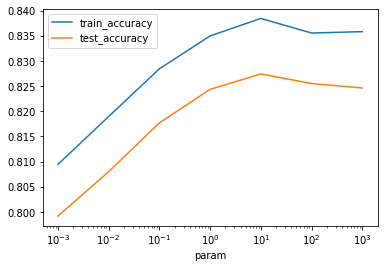

In [0]:
param_df = hyperparameter(Data_X, y)
param_df.plot(x="param", y=["train_accuracy", "test_accuracy"], logx=True)

The best performance is where the test set F1 score is the highest. We see that this happens when C=10. We will use this value going forward.

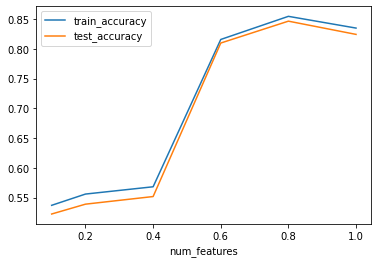

In [0]:
feature_num_df = feature_num_logistic(Data_X, y)
feature_num_df.plot(x="num_features", y=["train_accuracy", "test_accuracy"])

In [0]:
feature_num_df.head(6)

,num_features,train_accuracy,test_accuracy
0,0.1,0.537043,0.522426
1,0.2,0.555961,0.538984
2,0.4,0.568206,0.551789
3,0.6,0.815821,0.809819
4,0.8,0.854699,0.846596
5,1.0,0.834956,0.824349


In [0]:
train_mean10, train_low10, train_high10, test_mean10, test_low10, test_high10 = random_mean_ci_logistic(Data_X, y, num_tests = 30)
print("Train mean accuracy over 10 random splits: {}".format(train_mean10))
print("Train confidence interval over 10 random splits: [{}, {}]".format(train_low10, train_high10))
print("Test mean accuracy over 10 random splits: {}".format(test_mean10))
print("Test confidence interval over 10 random splits: [{}, {}]".format(test_low10, test_high10))

Train mean accuracy over 10 random splits: 0.8436465563130314
Train confidence interval over 10 random splits: [0.8385203758302858, 0.848772736795777]
Test mean accuracy over 10 random splits: 0.8422532924067051
Test confidence interval over 10 random splits: [0.8369172653026402, 0.84758931951077]


#### Naive Bayes

In [0]:
def hyperparameter(X, y):
    # result_list is a list of tuples (num_features, train_accuracy, test_accuracy)
    # where numFeatures is the number of words used as features
    result_list = []
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    for param in [0.000000001, 0.000000005, 0.00000001, 0.00000005, 0.0000001, 0.0000005]:
        
        
        # train a logistic regression classifier
        clf = GaussianNB(var_smoothing=param).fit(X_train, y_train)

        # predict on train and test set
        y_train_predict = clf.predict(X_train)
        y_test_predict = clf.predict(X_test)

        # calculate train and test accuracy

        
        # Write your code here to calculate train_accuracy and test_accuracy for the current parameter value
        # ......
        train_accuracy = f1_score(y_train, y_train_predict, average='weighted')
        test_accuracy = f1_score(y_test, y_test_predict, average='weighted')
        
        # add to result_list
        result_list.append((param, train_accuracy, test_accuracy))
        
    # Make a dataframe of the results
    result_df = pd.DataFrame(result_list, columns=["param", "train_accuracy", "test_accuracy"])
    
    # validate return type
    assert isinstance(result_df, pd.DataFrame), "return type"
    
    return result_df

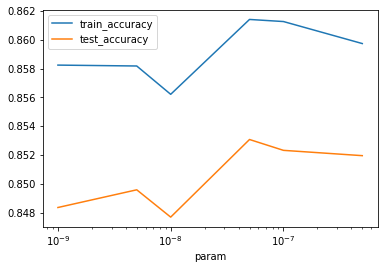

In [0]:
param_df = hyperparameter(Data_X, y)
param_df.plot(x="param", y=["train_accuracy", "test_accuracy"], logx=True)

The best performance is where the test set F1 score is the highest. We see that this happens around C=10**-7. We will use this going forward.

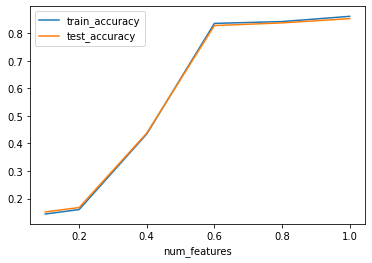

In [0]:
feature_num_df = feature_num_nb(Data_X, y)
feature_num_df.plot(x="num_features", y=["train_accuracy", "test_accuracy"])

In [0]:
feature_num_df.head(6)

,num_features,train_accuracy,test_accuracy
0,0.1,0.143844,0.151482
1,0.2,0.159951,0.167224
2,0.4,0.434336,0.437459
3,0.6,0.835700,0.827847
4,0.8,0.842429,0.837679
5,1.0,0.861408,0.853074


In [0]:
train_mean10, train_low10, train_high10, test_mean10, test_low10, test_high10 = random_mean_ci_nb(Data_X, y, num_tests = 30)
print("Train mean accuracy over 10 random splits: {}".format(train_mean10))
print("Train confidence interval over 10 random splits: [{}, {}]".format(train_low10, train_high10))
print("Test mean accuracy over 10 random splits: {}".format(test_mean10))
print("Test confidence interval over 10 random splits: [{}, {}]".format(test_low10, test_high10))

Train mean accuracy over 10 random splits: 0.8571911659545128
Train confidence interval over 10 random splits: [0.8563715885207416, 0.8580107433882841]
Test mean accuracy over 10 random splits: 0.8558713940453068
Test confidence interval over 10 random splits: [0.85395808651358, 0.8577847015770336]


#### Linear SVM

In [0]:
def hyperparameter(X, y):
    # result_list is a list of tuples (num_features, train_accuracy, test_accuracy)
    # where numFeatures is the number of words used as features
    result_list = []
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    for param in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
        
        
        # train a logistic regression classifier
        clf = LinearSVC(C=param).fit(X_train, y_train)

        # predict on train and test set
        y_train_predict = clf.predict(X_train)
        y_test_predict = clf.predict(X_test)

        # calculate train and test accuracy

        
        # Write your code here to calculate train_accuracy and test_accuracy for the current parameter value
        # ......
        train_accuracy = f1_score(y_train, y_train_predict, average='weighted')
        test_accuracy = f1_score(y_test, y_test_predict, average='weighted')
        
        # add to result_list
        result_list.append((param, train_accuracy, test_accuracy))
        
    # Make a dataframe of the results
    result_df = pd.DataFrame(result_list, columns=["param", "train_accuracy", "test_accuracy"])
    
    # validate return type
    assert isinstance(result_df, pd.DataFrame), "return type"
    
    return result_df

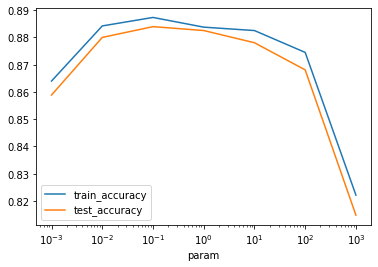

In [0]:
param_df = hyperparameter(Data_X, y)
param_df.plot(x="param", y=["train_accuracy", "test_accuracy"], logx=True)

The best performance is where the test set F1 score is the highest. We see that this happens when C=0.1.We will use this going forward.

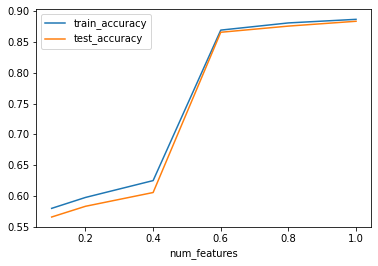

In [0]:
feature_num_df = feature_num_svm(Data_X, y)
feature_num_df.plot(x="num_features", y=["train_accuracy", "test_accuracy"])

In [0]:
feature_num_df.head(6)

,num_features,train_accuracy,test_accuracy
0,0.1,0.579903,0.565855
1,0.2,0.597622,0.583262
2,0.4,0.624979,0.605610
3,0.6,0.869241,0.865734
4,0.8,0.880906,0.875759
5,1.0,0.886731,0.883597


In [0]:
train_mean10, train_low10, train_high10, test_mean10, test_low10, test_high10 = random_mean_ci_svm(Data_X, y, num_tests = 30)
print("Train mean accuracy over 10 random splits: {}".format(train_mean10))
print("Train confidence interval over 10 random splits: [{}, {}]".format(train_low10, train_high10))
print("Test mean accuracy over 10 random splits: {}".format(test_mean10))
print("Test confidence interval over 10 random splits: [{}, {}]".format(test_low10, test_high10))

Train mean accuracy over 10 random splits: 0.8859259308607014
Train confidence interval over 10 random splits: [0.8852284449225232, 0.8866234167988796]
Test mean accuracy over 10 random splits: 0.8861880678127136
Test confidence interval over 10 random splits: [0.8849771909016181, 0.8873989447238092]


#### Model Results (mean test F1 score with 95% confidence interval)


Feature Fraction | LogReg | Naive Bayes | SVM
--- | --- --- | --- --- | ---
p=0.6 | 0.810 | 0.828 | 0.864
p=0.8 | 0.847 | 0.838 | 0.882
p=1.0 | 0.824 | 0.853 | 0.883

0 | LogReg | Naive Bayes | SVM
--- | --- --- | --- --- | ---
 | 0.838 +/- 0.005 | 0.855 +/- 0.002 | 0.886 +/- 0.001


The F1-score of LinearSVM model is the best of all models and for all feature fractions with a strong F1 score. However, performance of Naive Bayes is also comparable. If this model was to be reproduced with many more records, the Naive Bayes algorithm could certainly be the model of choice due it its one linear pass characteristic.

This suggests that the feature set we created (i.e. by using PMI) was a reasonable choice. If our model performance was not good, we could have tried a couple of things. For example, use topk specific to the class, or try other feature encoding methods (e.g. TF) instead of binary encoding.

We also see a very minor performance decrease with SVM for p=0.8 vs. p=1.0, which means there is a small potential to make the model more efficient.

### Analyzing Performance

In [0]:
def plot_confusion_matrix(cm):
    # plot the confusion matrix
    plt.figure(figsize=(10,10))
    plt.matshow(cm, fignum=1)
    
    # add labels for all targets
    num_targets = cm.shape[0]
    plt.xticks(list(range(num_targets+1)))
    plt.yticks(list(range(num_targets+1)))

In [0]:
def random_cm(X, y, num_tests):
    # cm_list is a list of confusion matrices for the different random splits of the dataset
    cm_list = []
    
     #loop this num_tests times
    for num_tests in range(0,num_tests):
      # split to train and test set
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random.randint(1,1000))

      # train a logistic regression classifier
      clf = LinearSVC(C=1).fit(X_train, y_train)

      # predict on train and test set
      y_train_predict = clf.predict(X_train)
      y_test_predict = clf.predict(X_test)

      # calculate train and test accuracy

      train_accuracy = f1_score(y_train, y_train_predict, average='weighted')
      test_accuracy = f1_score(y_test, y_test_predict, average='weighted')



      # append the confusion matrix for that particular random number onto cm_list
      cm_temp = (confusion_matrix(y_test, y_test_predict))  
      cm_list.append(cm_temp)
    
    # sum the confusion matrices and return the combined confusion matrix

    combined_cm = np.array(cm_list).sum(axis=0)
    
    # validate return type
    assert isinstance(combined_cm, np.ndarray), "return type"
    
    return combined_cm

In [0]:
cm10 = random_cm(Data_X, y, num_tests = 10)
# plot_confusion_matrix(cm10)

In [0]:
cmtx = pd.DataFrame(cm10,
    index=['true:1', 'true:2','true:3','true:4'], 
    columns=['pred:1', 'pred:2','pred:3','pred:4'])
print(cmtx)

        pred:1  pred:2  pred:3  pred:4
true:1   39736     429     398     189
true:2    1847    6646     400     101
true:3     921     162    8331     278
true:4    1690     225     713    4124


Class labels are as follows: 1-todayilearned, 2-atheism, 3-nba, 4-games

We see that the model is doing relatively well in classifying class nba from the rest. However, some of the high error values are 1) 2138, 1553 and 2) 1684.


1) The model makes relative high number of errors in classifying between atheism and todayilearned.


2) Model makes errors in classifying between todayilearned and games. It is interesting to note that in such cases, the model is biased towards predicting todayilearned in such cases. This could be due to the class imbalance because class todayilearned contains approximately 4x the observations. Further iterations can be performed to correct this if this is undesired, e.g. by experimenting with different "average" parameter within the F1_score metric. 

## Part 4: Sentiment Analysis

We use pointwise mutual information to evaluate the co-occurence of words for each class. It is valid because we want a measure of association between a word to specific class. Utilizing mutual information in this case would not be representative because it is not class specific, but instead refers to the average over all classes.

In [0]:
# Use vader to evaluated sentiment of reviews
def evalSentences(sentences, to_df=False, columns=[]):
    #Instantiate an instance to access SentimentIntensityAnalyzer class
    sid = SentimentIntensityAnalyzer()
    pdlist = []
    if to_df:
        for sentence in tqdm(sentences):
            ss = sid.polarity_scores(sentence)
            pdlist.append([sentence]+[ss['compound']])
        reviewDf = pandas.DataFrame(pdlist)
        reviewDf.columns = columns
        return reviewDf
    
    else:
        for sentence in tqdm(sentences):
            print(sentence)
            ss = sid.polarity_scores(sentence)
            for k in sorted(ss):
                print('{0}: {1}, '.format(k, ss[k]), end='')
            print()

In [0]:
# Simple example of getting pairwise mutual information of a term
def pmiCal(df, x):
    pmilist=[]
    for i in ['positive','negative']:
        for j in [0,1]:
            px = sum(df['est_truth']==i)/len(df)
            py = sum(df[x]==j)/len(df)
            pxy = len(df[(df['est_truth']==i) & (df[x]==j)])/len(df)
            if pxy==0:#Log 0 cannot happen
                pmi = math.log((pxy+0.0001)/(px*py))
            else:
                pmi = math.log(pxy/(px*py))
            pmilist.append([i]+[j]+[px]+[py]+[pxy]+[pmi])
    pmidf = pandas.DataFrame(pmilist)
    pmidf.columns = ['x','y','px','py','pxy','pmi']
    return pmidf

In [0]:
def pmiIndivCal(df,x,gt, label_column='est_truth'):
    px = sum(df[label_column]==gt)/len(df)
    py = sum(df[x]==1)/len(df)
    pxy = len(df[(df[label_column]==gt) & (df[x]==1)])/len(df)
    if pxy==0:#Log 0 cannot happen
        pmi = math.log((pxy+0.0001)/(px*py))
    else:
        pmi = math.log(pxy/(px*py))
    return pmi

In [0]:
# Compute PMI for all terms and all possible labels
def pmiForAllCal(df, topk, label_column='est_truth'):


  # 'todayilearned', 'Games', 'nba', 'atheism'
    #Try calculate all the pmi for top k and store them into one pmidf dataframe
    pmilist = []
    pmiposlist = []
    pmineglist = []

    for word in tqdm(topk):
        pmilist.append([word[0]]+[pmiCal(df,word[0])])
        pmiposlist.append([word[0]]+[pmiIndivCal(df,word[0],'positive',label_column)])
        pmineglist.append([word[0]]+[pmiIndivCal(df,word[0],'negative',label_column)])

    pmidf = pandas.DataFrame(pmilist)
    pmiposlist = pandas.DataFrame(pmiposlist)
    pmineglist = pandas.DataFrame(pmineglist)

    pmiposlist.columns = ['word','pmi']
    pmineglist.columns = ['word','pmi']

    pmidf.columns = ['word','pmi']
    return pmiposlist, pmineglist, pmidf

In [0]:
# Note: You may want to use an NLTK tokenizer instead of a regular expression in the following
def dataFrameTransformation(hotelDf, reviewDF, col_name, k=500):
    reviews = reviewDF[col_name].values
       
    # Top-k frequent terms
    counter = Counter()
    for review in reviews:
            counter.update([word.lower() 
                            for word 
                            in re.findall(r'\w+', review) 
                            if len(word) > 2])
    topk = counter.most_common(k)      

    
    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter([word.lower() for word in re.findall(r'\w+',reviews[i])])
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)
        
        
    #Prepare freqReviewDf
    freqReviewDf = pandas.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finalreviewDf = reviewDF.join(freqReviewDf)
    finaldf = hotelDf[["est_truth", "id"]].join(finalreviewDf)
    return topk, finaldf

In [0]:
reviews = data['title'].values
reviews

array(['TIL the IRS spent nearly $11 million on guns, ammunition and military-style equipment. That’s nearly $5,000 in gear for each agent.',
       'so its new year and i didnt want to go to church',
       "Spurs' Gay out vs. Celtics with injured wrist", ...,
       'Til Salvadoran businessman and Jewish one saved thousands of news from ending holocaust',
       'Windhorst: "when they iced Dennis Smith a few weeks ago... one of the teams they were talking to was Orlando about Mo Bamba... Mo Bamba is available on the market"',
       'GAME THREAD: Milwaukee Bucks (36-13) @ Toronto Raptors (37-15) - (January 31, 2019)'],
      dtype=object)

In [0]:
data.shape

(22063, 13)

In [0]:
reviewDF = evalSentences(reviews, to_df=True, columns=['title','vader'])
reviewDF.reset_index(drop = True, inplace = True)
reviewDF.head()

100%|██████████| 22063/22063 [00:06<00:00, 3660.38it/s]


,title,vader
0,"TIL the IRS spent nearly $11 million on guns, ...",0.0000
1,so its new year and i didnt want to go to church,-0.0572
2,Spurs' Gay out vs. Celtics with injured wrist,-0.4019
3,TIL that America had a period where “Fly In Dr...,0.0000
4,"TIL If Andromeda reflected more light, it woul...",0.0000


In [0]:
join_df = pd.merge(reviewDF,
                 data,
                 left_on='title', 
                 right_on='title',
                 how='inner')



join_df.shape

(23739, 14)

In [0]:
#there are duplicate titles. We'll remove them.
join_df.drop_duplicates(subset ="title", 
                     keep = "first", inplace = True)

join_df.shape

(21577, 14)

In [0]:
df_1 = join_df[join_df["subreddit"] == "todayilearned"]
df_2 = join_df[join_df["subreddit"] == "atheism"]
df_3 = join_df[join_df["subreddit"] == "nba"]
df_4 = join_df[join_df["subreddit"] == "Games"]


In [0]:
from matplotlib import pyplot
plt.style.use('ggplot')

col = "vader"

a = df_1[col]
b = df_2[col]
c = df_3[col]
d = df_4[col]

The only way to ascertain true positive and negative sentiment is via. human judgement. However, as instructed, we try to make a determination by just looking at the distribution. We pick -0.8 and 0.8 for all classes.

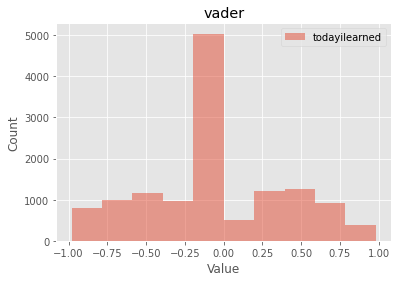

In [0]:
pyplot.hist(a, alpha=0.5, label='todayilearned')
pyplot.legend(loc='upper right')
pyplot.xlabel("Value")
pyplot.ylabel("Count")
pyplot.title(col)
pyplot.show()


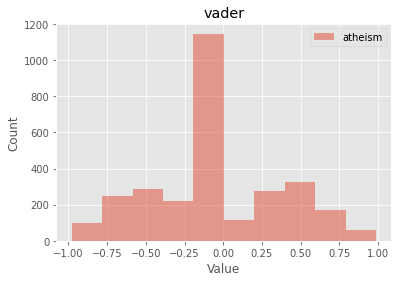

In [0]:
pyplot.hist(b, alpha=0.5, label='atheism')
pyplot.legend(loc='upper right')
pyplot.xlabel("Value")
pyplot.ylabel("Count")
pyplot.title(col)
pyplot.show()



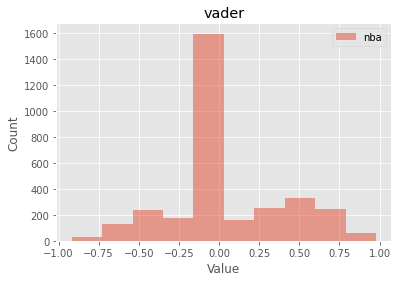

In [0]:
pyplot.hist(c, alpha=0.5, label='nba')
pyplot.legend(loc='upper right')
pyplot.xlabel("Value")
pyplot.ylabel("Count")
pyplot.title(col)
pyplot.show()

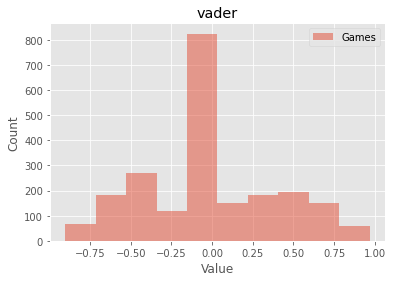

In [0]:
pyplot.hist(d, alpha=0.5, label='Games')
pyplot.legend(loc='upper right')
pyplot.xlabel("Value")
pyplot.ylabel("Count")
pyplot.title(col)
pyplot.show()

In [0]:
join_df['est_truth'] = join_df['vader'].apply(lambda x: "positive" if x >0.8 else ("negative" if x <-0.8 else "in_between"))
filtered_df = join_df[ (join_df["est_truth"] == "positive") | (join_df["est_truth"] == "negative")]
filtered_df.shape

(1337, 15)

In [0]:
filtered_df["subreddit"].value_counts()

todayilearned    1059
atheism           134
Games              76
nba                68
Name: subreddit, dtype: int64

In [0]:
filtered_df.reset_index(inplace = True, drop = True)

In [0]:
df_todayilearned = filtered_df[filtered_df["subreddit"] == "todayilearned"]
df_atheism = filtered_df[filtered_df["subreddit"] == "atheism"]
df_nba = filtered_df[filtered_df["subreddit"] == "nba"]
df_games = filtered_df[filtered_df["subreddit"] == "Games"]

In [0]:
df_todayilearned.reset_index(inplace = True, drop = True)
df_atheism.reset_index(inplace = True, drop = True)
df_nba.reset_index(inplace = True, drop = True)
df_games.reset_index(inplace = True, drop = True)

In [0]:
# finaldf.fillna(0, inplace = True)

In [0]:
finaldf.tail()

,subreddit,id,selftext,score,deleted,removed,com,amp,god,like,https,would,people,nba,one,game,think,know,time,www,get,religion,games,even,team,really,believe,good,also,years,atheist,want,life,year,see,still,religious,could,season,players,x200b,say,church,make,said,things,christian,going,player,way,much,something,first,point
22058,Games,alvoui,,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22059,todayilearned,alvra2,,126,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22060,todayilearned,alvsh3,,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22061,nba,alvsz8,[deleted],481,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22062,nba,alvtu8,##General Information\n\n**TIME** |**MEDIA...,78,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Todayilearned

From the results below we notice some trends as follows:

Words like best and care were labelled as positive by Vader. In negative class words like death and killed. However, given the context of the subreddit todayilearned, it is not necessary that these posts are positive or negative sentiment. For example, words like death or killed, could  have simply been used to describe factual historic events, and not necessarily an underlying postive or negative tone to the post.

In [0]:
reviewDF = df_todayilearned[["title", "score"]]
otherDF = df_todayilearned[["est_truth", "id"]]


topk, finaldf = dataFrameTransformation(otherDF, reviewDF, "title", k=50)

In [0]:
pmiposlist, pmineglist, pmidf = pmiForAllCal(finaldf, topk)

100%|██████████| 50/50 [00:00<00:00, 88.95it/s]


In [0]:
pmiposlist.sort_values("pmi", ascending = False)[0:10]

,word,pmi
39,best,1.100292
48,care,1.049649
46,your,0.633134
24,you,0.379685
43,can,0.277074
32,not,0.251831
17,have,0.247246
12,are,0.237753
42,all,0.194383
36,but,0.174180


In [0]:
pmineglist.sort_values("pmi", ascending = False)[0:10]

,word,pmi
28,death,0.395599
16,killed,0.385843
18,war,0.371207
23,died,0.371207
33,years,0.277816
14,after,0.245787
15,people,0.234826
25,during,0.228545
11,were,0.204061
19,when,0.192658


### atheism

From the results below we notice some trends as follows:

Words like good and sing were labelled as positive by Vader. In negative class, words like hate and hell. These words could be representative of these sentiments. It is interesting that the word catholic was associated with a negative sentiment within the atheist subreddit.

In [0]:
reviewDF = df_atheism[["title", "score"]]
otherDF = df_atheism[["est_truth", "id"]]


topk, finaldf = dataFrameTransformation(otherDF, reviewDF, "title", k=50)

In [0]:
pmiposlist, pmineglist, pmidf = pmiForAllCal(finaldf, topk)

100%|██████████| 50/50 [00:00<00:00, 106.87it/s]


In [0]:
pmiposlist.sort_values("pmi", ascending = False)[0:10]

,word,pmi
33,good,0.946596
10,sing,0.946596
24,all,0.541131
31,like,0.476592
13,can,0.461088
15,christian,0.461088
20,out,0.461088
8,god,0.435770
44,him,0.386980
37,atheist,0.358809


In [0]:
pmineglist.sort_values("pmi", ascending = False)[0:10]

,word,pmi
49,hell,0.491121
41,hate,0.491121
28,catholic,0.491121
17,abuse,0.491121
35,accused,0.491121
22,church,0.385760
48,what,0.336970
21,was,0.308799
36,who,0.267977
30,after,0.267977


### nba

From the results below we do not notice any obvious words that could contain information about the post sentiment.

In [0]:
reviewDF = df_nba[["title", "score"]]
otherDF = df_nba[["est_truth", "id"]]


topk, finaldf = dataFrameTransformation(otherDF, reviewDF, "title", k=50)

In [0]:
pmiposlist, pmineglist, pmidf = pmiForAllCal(finaldf, topk)

100%|██████████| 50/50 [00:00<00:00, 116.77it/s]


In [0]:
pmiposlist.sort_values("pmi", ascending = False)[0:10]

,word,pmi
25,year,0.249216
35,all,0.249216
26,trade,0.249216
31,play,0.249216
37,players,0.249216
29,most,0.249216
47,wins,0.249216
3,best,0.249216
40,before,0.249216
28,have,0.249216


In [0]:
pmineglist.sort_values("pmi", ascending = False)[0:10]

,word,pmi
48,embiid,1.105992
34,after,0.818310
49,they,0.818310
45,new,0.595167
32,can,0.595167
11,game,0.499857
23,just,0.412845
6,his,0.348307
15,has,0.307485
39,was,0.125163


### games

From the results below we notice some trends as follows:

Words like love and fun were labelled as positive by Vader. In negative class, words like gun and damage. Again, the sentiment evaluated by Vader by not be accurate because these words could have just been used to describe certain games.

In [0]:
reviewDF = df_games[["title", "score"]]
otherDF = df_games[["est_truth", "id"]]


topk, finaldf = dataFrameTransformation(otherDF, reviewDF, "title", k=50)

In [0]:
pmiposlist, pmineglist, pmidf = pmiForAllCal(finaldf, topk)

100%|██████████| 50/50 [00:00<00:00, 115.13it/s]


In [0]:
pmiposlist.sort_values("pmi", ascending = False)[0:10]

,word,pmi
40,love,0.438913
45,slots,0.438913
42,paragon,0.438913
34,fun,0.438913
8,you,0.438913
35,win,0.438913
37,happy,0.438913
33,more,0.438913
16,first,0.438913
14,this,0.438913


In [0]:
pmineglist.sort_values("pmi", ascending = False)[0:10]

,word,pmi
49,gun,1.034896
44,damage,1.034896
23,resident,1.034896
22,design,1.034896
32,dead,1.034896
24,evil,1.034896
18,new,0.811753
41,star,0.747214
19,standalone,0.629431
48,dayz,0.341749
